## Mobile dataset to predict mobile name

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
dataset = pd.read_csv('phonodatset.csv')
dataset.head(40)

,brand,name,price,camera,screen size
0,apple,Apple iPhone X,74999.0,12.0,5.80
1,apple,Apple iPhone 8 Plus,63999.0,12.0,5.50
2,apple,Apple iPhone 8,53999.0,12.0,4.70
3,apple,Apple iPhone 7 Plus,44999.0,12.0,5.50
4,apple,Apple iPhone 7,38999.0,12.0,4.70
5,apple,Apple iPhone SE,23999.0,12.0,4.00
6,apple,Apple iPhone 6s Plus,41290.0,12.0,5.50
7,apple,Apple iPhone 6s,31000.0,12.0,4.70
8,apple,Apple iPhone 6 Plus,41290.0,8.0,5.50
9,apple,Apple iPhone 6,18999.0,8.0,4.70


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
brand          112 non-null object
name           112 non-null object
price          112 non-null float64
camera         112 non-null float64
screen size    112 non-null float64
dtypes: float64(3), object(2)
memory usage: 4.5+ KB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,112.0,19529.423482,14912.381788,5500.0,9921.75,14549.5,22400.0,74999.00
camera,112.0,13.012500,4.061955,5.0,12.00,13.0,13.0,40.00
screen size,112.0,5.537946,0.520251,3.5,5.20,5.5,6.0,6.41


In [5]:
dataset.duplicated().sum()

0

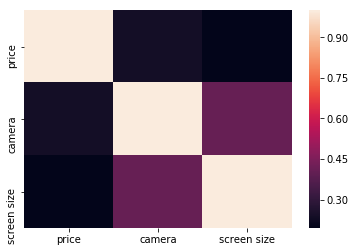

In [6]:
#Display heatmap to show correlation between diff variables
corr = dataset.corr()
sb.heatmap(corr)

In [7]:
# split the dataset
x_data = dataset.iloc[:, [0,2,3,4]].values
y_data = dataset.iloc[:, [1]].values
x_data.shape, y_data.shape

((112, 4), (112, 1))

In [8]:
type(y_data)

numpy.ndarray

In [9]:
dataf = pd.DataFrame(y_data) 
type(dataf)

pandas.core.frame.DataFrame

In [10]:
dataf.to_csv('CsvFiles/label_data.csv')

In [11]:
new_data = pd.read_csv('CsvFiles/label_data.csv')
new_data.head(2)

,Unnamed: 0,0
0,0,Apple iPhone X
1,1,Apple iPhone 8 Plus


In [12]:
y_new = new_data.iloc[:,0].values
y_new

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111])

In [13]:
y_new.shape

(112,)

In [14]:
labelencoder_X_1 = LabelEncoder() 
x_data[:,0] = labelencoder_X_1.fit_transform(x_data[:,0])

labelencoder_X_2 = LabelEncoder() 
x_data[:, 0] = labelencoder_X_2.fit_transform(x_data[:, 0])

In [15]:
"""We use the same ScikitLearn library and another function called the OneHotEncoder to just pass the column
number creating a dummy variable."""
onehotencoder = OneHotEncoder(categorical_features = [0])
x_data = onehotencoder.fit_transform(x_data).toarray()
x_data = x_data[:, 0:]

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [16]:
# import os
# os.mkdir('CsvFiles')
from sklearn.model_selection import train_test_split

In [17]:

# split train and test data
x, x_test, y, y_test = train_test_split(x_data,y_new,test_size = 0.20, random_state=0)
print("train : ", x.shape,y.shape ," test : ", x_test.shape,y_test.shape)

# # saving datasets into csv files
df1 =pd.DataFrame(x_test)
df2 = pd.DataFrame(y_test)
df = pd.concat([df1, df2], axis=1, ignore_index=True) 
df.to_csv('CsvFiles/test_file.csv',index=False,encoding='utf-8')

# divide train data into train and cross validation 
x_train, x_cv,y_train, y_cv = train_test_split(x,y,test_size = 0.20,random_state=0)

print("train_data : ", x_train.shape,y_train.shape, " crossV_data : ", x_cv.shape,y_cv.shape)

train :  (89, 11) (89,)  test :  (23, 11) (23,)
train_data :  (71, 11) (71,)  crossV_data :  (18, 11) (18,)


In [18]:
# split train and test data
x, x_test, y, y_test = train_test_split(x_data,y_data,test_size = 0.20, random_state=0)
print("train : ", x.shape,y.shape ," test : ", x_test.shape,y_test.shape)

# # saving datasets into csv files
df1 =pd.DataFrame(x_test)
df2 = pd.DataFrame(y_test)
df = pd.concat([df1, df2], axis=1, ignore_index=True) 
df.to_csv('CsvFiles/test_file.csv',index=False,encoding='utf-8')

x_train1, x_cv1,y_train1, y_cv1 = train_test_split(x,y,test_size = 0.20,random_state=0)

# divide train data into train and cross validation 
print("train_data : ", x_train1.shape,y_train1.shape, " crossV_data : ", x_cv1.shape,y_cv1.shape)

train :  (89, 11) (89, 1)  test :  (23, 11) (23, 1)
train_data :  (71, 11) (71, 1)  crossV_data :  (18, 11) (18, 1)


In [19]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_cv):
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_cv = sc.transform(x_cv)
    
    return sc, x_train,x_cv
    
sc, x_train,x_cv = feature_scalling(x_train,x_cv)

In [20]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train) 

In [21]:
# creating a confusion matrix 
knn_predictions = knn.predict(x_cv)  
cm = confusion_matrix(y_cv, knn_predictions) 

In [22]:
print("classification report\n\n", classification_report(y_cv,knn_predictions))

classification report

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
   

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [23]:
# accuracy on X_test 
accuracy = knn.score(x_cv, y_cv) 
print(accuracy)

0.0


In [24]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_cv) 
  
# accuracy on X_test 
accuracy = gnb.score(x_cv, y_cv) 
print( accuracy )
  
# creating a confusion matrix 
cm = confusion_matrix(y_cv, gnb_predictions) 

0.0


In [25]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
from sklearn.metrics import roc_curve, auc
# to check accuracy
from sklearn.metrics import *
# #Classification library
from sklearn.svm import SVC
import pickle 

from sklearn import metrics
from sklearn.metrics import confusion_matrix

### SVC

In [26]:
# classifier = SVC(kernel= 'rbf',random_state=0, probability=True)
# classifier = SVC(kernel= 'rbf',gamma='auto_deprecated')
classifier = SVC(kernel= 'rbf',C=1,gamma=10)
# classifier = classifier.fit(x_train,y_train)
classifier.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_predict = classifier.predict(x_cv)
y_predict_train = classifier.predict(x_train)


In [28]:
y_cv, y_predict

(array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
         72,   6,  27,   1, 109]),
 array([ 25,  36,  14,  57,  46,  15,  95,  15,  83,  40,  64,  46,  39,
         67,   3,  31,   0, 110]))

In [29]:
y_train, y_predict_train

(array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]),
 array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]))

In [30]:
# show confusion matrix
cm = confusion_matrix(y_cv,y_predict)
print("\n\nConfusion Matrix:\n",cm)



Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [31]:
# show confusion matrix
cm = confusion_matrix(y_train,y_predict_train)
print("\n\nConfusion Matrix:\n",cm)



Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [32]:
# print(classification_report(y_train, y_predict_train))

In [33]:
# print(classification_report(y_cv, y_predict))

In [34]:
classifier_11 = SVC(kernel= 'poly',C=1,gamma=1).fit(x_train, y_train)


In [35]:
y_predict1 = classifier_11.predict(x_cv)
y_predict_train1 = classifier_11.predict(x_train)

In [36]:
y_cv, y_predict1

(array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
         72,   6,  27,   1, 109]),
 array([ 25,  36,  14,  57,  35,  15,  95,  14,  83,  40,  64,  46,  39,
         67,   3,  31,   0, 110]))

In [37]:
y_train, y_predict_train1

(array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]),
 array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]))

### DecisionTreeClassifier

In [38]:
# #Classification library
from sklearn.tree import DecisionTreeClassifier

In [39]:
# fitting KNN Classification to the training set
classifier_decision = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifier_decision = classifier_decision.fit(x_train,y_train)


In [40]:
y_predict2 = classifier_decision.predict(x_cv)


In [41]:
y_predict_train2 = classifier_decision.predict(x_train)

In [42]:
y_cv, y_predict2

(array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
         72,   6,  27,   1, 109]),
 array([101,  94, 108, 101,  35,  15, 101,  83,  83,  46,  77,  35,  49,
         64,   3,  94,   3,  81]))

In [43]:
y_train, y_predict_train2

(array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]),
 array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]))

### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
classifier_random = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
y_predict3 = classifier_random.predict(x_cv)

In [47]:
y_predict_train3 = classifier_random.predict(x_train)

In [48]:
y_cv, y_predict3

(array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
         72,   6,  27,   1, 109]),
 array([ 70,  36,  15,  57,  35,  15,  88,  15,  83,  40,  64,  36,  21,
         67,   3,  20,   0, 110]))

In [49]:
y_train, y_predict_train3

(array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]),
 array([ 70,  35,  73,  54,  20,  88,  21,  29,  58,  36,   9,  59, 105,
         99,  35,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  21]))

### Nueral Network

In [50]:
# Importing the Keras libraries and packages (Using TensorFlow backend.)
import keras 
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [51]:
#Initializing Neural Network 
classifier_nn = Sequential()

In [52]:
x_train.shape

(71, 11)

In [53]:
# # 1st layer (addthe input layer and the first hidden layer −)
# # Use dense module to add the hidden layers.
# classifier_nn.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))

# # 2nd layer (bcoz we want to implement Deep Learning,which is an ANN with many layers)
# # we do not need to specify input dim. 
# classifier_nn.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# # output layer
# # sigmoid used instead of the ReLu function becasue it generates probabilities for the outcome. 
# # We want the probability that each customer leaves the bank.
# classifier_nn.add(Dense(units = 112, kernel_initializer = 'uniform', activation = 'softmax'))

In [54]:
# 1st layer (addthe input layer and the first hidden layer −)
# Use dense module to add the hidden layers.
classifier_nn.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))

# 2nd layer (bcoz we want to implement Deep Learning,which is an ANN with many layers)
# we do not need to specify input dim. 
classifier_nn.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

classifier_nn.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))

# classifier_nn.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# output layer
# sigmoid used instead of the ReLu function becasue it generates probabilities for the outcome. 
# We want the probability that each customer leaves the bank.
classifier_nn.add(Dense(units = 112,  activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
type(classifier_nn)

keras.engine.sequential.Sequential

In [61]:
# Compiling Neural Network 
# classifier.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier_nn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [62]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)
y_binary.shape

(71, 112)

###### ValueError: You are passing a target array of shape (71, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [63]:
x_cv.shape, y_cv.shape

((18, 11), (18,))

In [95]:
# x_cv

In [65]:
# Fitting ANN to the training set
classifier_nn.fit(x_train, y_train, batch_size = 500, epochs = 10000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10000
71/71 [==============================] - 0s 3ms/step - loss: 4.7185 - acc: 0.0000e+00
Epoch 2/10000
71/71 [==============================] - 0s 34us/step - loss: 4.7174 - acc: 0.0000e+00
Epoch 3/10000
71/71 [==============================] - 0s 31us/step - loss: 4.7159 - acc: 0.0141
Epoch 4/10000
71/71 [==============================] - 0s 57us/step - loss: 4.7146 - acc: 0.0141
Epoch 5/10000
71/71 [==============================] - 0s 68us/step - loss: 4.7132 - acc: 0.0141
Epoch 6/10000
71/71 [==============================] - 0s 42us/step - loss: 4.7115 - acc: 0.0282
Epoch 7/10000
71/71 [==============================] - 0s 34us/step - loss: 4.7097 - acc: 0.0282
Epoch 8/10000
71/71 [==============================] - 0s 34us/step - loss: 4.7078 - acc: 0.0282
Epoch 9/10000
71/71 [==============================] - 0s 32us/step - loss: 4.7056 - acc: 0.0282
Epoch 10/10000
71/71 [==============================] - 0s 80us/step - l

Epoch 82/10000
71/71 [==============================] - 0s 77us/step - loss: 2.7611 - acc: 0.2113
Epoch 83/10000
71/71 [==============================] - 0s 50us/step - loss: 2.7203 - acc: 0.2254
Epoch 84/10000
71/71 [==============================] - 0s 36us/step - loss: 2.6802 - acc: 0.2394
Epoch 85/10000
71/71 [==============================] - 0s 27us/step - loss: 2.6405 - acc: 0.2535
Epoch 86/10000
71/71 [==============================] - 0s 22us/step - loss: 2.6008 - acc: 0.2535
Epoch 87/10000
71/71 [==============================] - 0s 39us/step - loss: 2.5616 - acc: 0.2958
Epoch 88/10000
71/71 [==============================] - 0s 64us/step - loss: 2.5230 - acc: 0.3239
Epoch 89/10000
71/71 [==============================] - 0s 45us/step - loss: 2.4850 - acc: 0.3380
Epoch 90/10000
71/71 [==============================] - 0s 24us/step - loss: 2.4475 - acc: 0.3521
Epoch 91/10000
71/71 [==============================] - 0s 28us/step - loss: 2.4102 - acc: 0.3521
Epoch 92/10000
71/71

Epoch 165/10000
71/71 [==============================] - 0s 23us/step - loss: 0.6989 - acc: 0.9437
Epoch 166/10000
71/71 [==============================] - 0s 20us/step - loss: 0.6850 - acc: 0.9437
Epoch 167/10000
71/71 [==============================] - 0s 46us/step - loss: 0.6715 - acc: 0.9296
Epoch 168/10000
71/71 [==============================] - 0s 32us/step - loss: 0.6582 - acc: 0.9296
Epoch 169/10000
71/71 [==============================] - 0s 36us/step - loss: 0.6452 - acc: 0.9437
Epoch 170/10000
71/71 [==============================] - 0s 22us/step - loss: 0.6323 - acc: 0.9437
Epoch 171/10000
71/71 [==============================] - 0s 32us/step - loss: 0.6198 - acc: 0.9437
Epoch 172/10000
71/71 [==============================] - 0s 44us/step - loss: 0.6074 - acc: 0.9437
Epoch 173/10000
71/71 [==============================] - 0s 39us/step - loss: 0.5954 - acc: 0.9437
Epoch 174/10000
71/71 [==============================] - 0s 25us/step - loss: 0.5836 - acc: 0.9437
Epoch 175/

Epoch 248/10000
71/71 [==============================] - 0s 60us/step - loss: 0.1684 - acc: 0.9859
Epoch 249/10000
71/71 [==============================] - 0s 27us/step - loss: 0.1661 - acc: 0.9859
Epoch 250/10000
71/71 [==============================] - 0s 49us/step - loss: 0.1639 - acc: 0.9859
Epoch 251/10000
71/71 [==============================] - 0s 24us/step - loss: 0.1616 - acc: 0.9859
Epoch 252/10000
71/71 [==============================] - 0s 47us/step - loss: 0.1595 - acc: 0.9859
Epoch 253/10000
71/71 [==============================] - 0s 24us/step - loss: 0.1573 - acc: 0.9859
Epoch 254/10000
71/71 [==============================] - 0s 40us/step - loss: 0.1553 - acc: 0.9859
Epoch 255/10000
71/71 [==============================] - 0s 46us/step - loss: 0.1532 - acc: 0.9859
Epoch 256/10000
71/71 [==============================] - 0s 26us/step - loss: 0.1512 - acc: 0.9859
Epoch 257/10000
71/71 [==============================] - 0s 19us/step - loss: 0.1492 - acc: 0.9859
Epoch 258/

Epoch 331/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0729 - acc: 0.9859
Epoch 332/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0724 - acc: 0.9859
Epoch 333/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0720 - acc: 0.9859
Epoch 334/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0716 - acc: 0.9859
Epoch 335/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0711 - acc: 0.9859
Epoch 336/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0707 - acc: 0.9859
Epoch 337/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0703 - acc: 0.9859
Epoch 338/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0699 - acc: 0.9859
Epoch 339/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0695 - acc: 0.9859
Epoch 340/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0691 - acc: 0.9859
Epoch 341/

Epoch 414/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0521 - acc: 1.0000
Epoch 415/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0520 - acc: 1.0000
Epoch 416/10000
71/71 [==============================] - 0s 52us/step - loss: 0.0519 - acc: 1.0000
Epoch 417/10000
71/71 [==============================] - 0s 56us/step - loss: 0.0518 - acc: 1.0000
Epoch 418/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0516 - acc: 1.0000
Epoch 419/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0515 - acc: 1.0000
Epoch 420/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0514 - acc: 1.0000
Epoch 421/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0513 - acc: 1.0000
Epoch 422/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0511 - acc: 1.0000
Epoch 423/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0510 - acc: 1.0000
Epoch 424/

Epoch 497/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0449 - acc: 1.0000
Epoch 498/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0448 - acc: 0.9859
Epoch 499/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0448 - acc: 0.9718
Epoch 500/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0447 - acc: 0.9718
Epoch 501/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0447 - acc: 0.9859
Epoch 502/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0446 - acc: 0.9859
Epoch 503/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0445 - acc: 1.0000
Epoch 504/10000
71/71 [==============================] - 0s 19us/step - loss: 0.0445 - acc: 1.0000
Epoch 505/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0444 - acc: 1.0000
Epoch 506/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0444 - acc: 0.9859
Epoch 507/

Epoch 580/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0411 - acc: 1.0000
Epoch 581/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0411 - acc: 1.0000
Epoch 582/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0411 - acc: 1.0000
Epoch 583/10000
71/71 [==============================] - 0s 70us/step - loss: 0.0410 - acc: 1.0000
Epoch 584/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0410 - acc: 1.0000
Epoch 585/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0409 - acc: 1.0000
Epoch 586/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0409 - acc: 1.0000
Epoch 587/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0409 - acc: 1.0000
Epoch 588/10000
71/71 [==============================] - 0s 79us/step - loss: 0.0408 - acc: 1.0000
Epoch 589/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0408 - acc: 1.0000
Epoch 590/

Epoch 663/10000
71/71 [==============================] - 0s 57us/step - loss: 0.0387 - acc: 1.0000
Epoch 664/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0387 - acc: 1.0000
Epoch 665/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0387 - acc: 1.0000
Epoch 666/10000
71/71 [==============================] - 0s 61us/step - loss: 0.0387 - acc: 0.9859
Epoch 667/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0387 - acc: 0.9859
Epoch 668/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0387 - acc: 0.9859
Epoch 669/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0386 - acc: 0.9859
Epoch 670/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0385 - acc: 1.0000
Epoch 671/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0384 - acc: 1.0000
Epoch 672/10000
71/71 [==============================] - 0s 64us/step - loss: 0.0384 - acc: 1.0000
Epoch 673/

Epoch 746/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0367 - acc: 1.0000
Epoch 747/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0367 - acc: 1.0000
Epoch 748/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0366 - acc: 1.0000
Epoch 749/10000
71/71 [==============================] - 0s 59us/step - loss: 0.0366 - acc: 1.0000
Epoch 750/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0366 - acc: 1.0000
Epoch 751/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0366 - acc: 1.0000
Epoch 752/10000
71/71 [==============================] - 0s 76us/step - loss: 0.0366 - acc: 1.0000
Epoch 753/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0366 - acc: 1.0000
Epoch 754/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0367 - acc: 1.0000
Epoch 755/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0367 - acc: 0.9859
Epoch 756/

Epoch 829/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0351 - acc: 1.0000
Epoch 830/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0351 - acc: 1.0000
Epoch 831/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0351 - acc: 1.0000
Epoch 832/10000
71/71 [==============================] - 0s 63us/step - loss: 0.0351 - acc: 1.0000
Epoch 833/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0351 - acc: 1.0000
Epoch 834/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0351 - acc: 1.0000
Epoch 835/10000
71/71 [==============================] - 0s 137us/step - loss: 0.0351 - acc: 1.0000
Epoch 836/10000
71/71 [==============================] - 0s 69us/step - loss: 0.0351 - acc: 1.0000
Epoch 837/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0351 - acc: 1.0000
Epoch 838/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0350 - acc: 1.0000
Epoch 839

Epoch 912/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0337 - acc: 1.0000
Epoch 913/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0337 - acc: 1.0000
Epoch 914/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0337 - acc: 1.0000
Epoch 915/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0336 - acc: 1.0000
Epoch 916/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0336 - acc: 1.0000
Epoch 917/10000
71/71 [==============================] - 0s 97us/step - loss: 0.0336 - acc: 1.0000
Epoch 918/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0335 - acc: 1.0000
Epoch 919/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0335 - acc: 1.0000
Epoch 920/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0335 - acc: 1.0000
Epoch 921/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0335 - acc: 1.0000
Epoch 922/

Epoch 995/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0324 - acc: 1.0000
Epoch 996/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0324 - acc: 1.0000
Epoch 997/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0323 - acc: 1.0000
Epoch 998/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0323 - acc: 1.0000
Epoch 999/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0323 - acc: 1.0000
Epoch 1000/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0323 - acc: 1.0000
Epoch 1001/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0323 - acc: 1.0000
Epoch 1002/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0323 - acc: 1.0000
Epoch 1003/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0322 - acc: 1.0000
Epoch 1004/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0322 - acc: 1.0000
Epoch

Epoch 1077/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0312 - acc: 1.0000
Epoch 1078/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0312 - acc: 1.0000
Epoch 1079/10000
71/71 [==============================] - 0s 55us/step - loss: 0.0312 - acc: 1.0000
Epoch 1080/10000
71/71 [==============================] - 0s 66us/step - loss: 0.0311 - acc: 1.0000
Epoch 1081/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0311 - acc: 1.0000
Epoch 1082/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0311 - acc: 1.0000
Epoch 1083/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0311 - acc: 1.0000
Epoch 1084/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0311 - acc: 1.0000
Epoch 1085/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0311 - acc: 1.0000
Epoch 1086/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0311 - acc: 1.0000


Epoch 1159/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0304 - acc: 1.0000
Epoch 1160/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0310 - acc: 0.9859
Epoch 1161/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0312 - acc: 0.9859
Epoch 1162/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0310 - acc: 0.9859
Epoch 1163/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0304 - acc: 1.0000
Epoch 1164/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0300 - acc: 1.0000
Epoch 1165/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0300 - acc: 1.0000
Epoch 1166/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0304 - acc: 1.0000
Epoch 1167/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0306 - acc: 1.0000
Epoch 1168/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0305 - acc: 1.0000


Epoch 1241/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0291 - acc: 1.0000
Epoch 1242/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0293 - acc: 1.0000
Epoch 1243/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0293 - acc: 1.0000
Epoch 1244/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0292 - acc: 1.0000
Epoch 1245/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0291 - acc: 1.0000
Epoch 1246/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0289 - acc: 1.0000
Epoch 1247/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0288 - acc: 1.0000
Epoch 1248/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0288 - acc: 1.0000
Epoch 1249/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0289 - acc: 1.0000
Epoch 1250/10000
71/71 [==============================] - 0s 84us/step - loss: 0.0290 - acc: 1.0000


Epoch 1323/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0278 - acc: 1.0000
Epoch 1324/10000
71/71 [==============================] - 0s 69us/step - loss: 0.0278 - acc: 1.0000
Epoch 1325/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0278 - acc: 1.0000
Epoch 1326/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0279 - acc: 1.0000
Epoch 1327/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0279 - acc: 1.0000
Epoch 1328/10000
71/71 [==============================] - 0s 20us/step - loss: 0.0279 - acc: 1.0000
Epoch 1329/10000
71/71 [==============================] - 0s 20us/step - loss: 0.0280 - acc: 1.0000
Epoch 1330/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0280 - acc: 1.0000
Epoch 1331/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0281 - acc: 1.0000
Epoch 1332/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0282 - acc: 1.0000


Epoch 1405/10000
71/71 [==============================] - 0s 90us/step - loss: 0.0268 - acc: 1.0000
Epoch 1406/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0268 - acc: 1.0000
Epoch 1407/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0269 - acc: 1.0000
Epoch 1408/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0270 - acc: 1.0000
Epoch 1409/10000
71/71 [==============================] - 0s 19us/step - loss: 0.0271 - acc: 1.0000
Epoch 1410/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0273 - acc: 1.0000
Epoch 1411/10000
71/71 [==============================] - 0s 63us/step - loss: 0.0274 - acc: 1.0000
Epoch 1412/10000
71/71 [==============================] - 0s 57us/step - loss: 0.0275 - acc: 1.0000
Epoch 1413/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0275 - acc: 1.0000
Epoch 1414/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0274 - acc: 1.0000


Epoch 1487/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0257 - acc: 1.0000
Epoch 1488/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0256 - acc: 1.0000
Epoch 1489/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0256 - acc: 1.0000
Epoch 1490/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0255 - acc: 1.0000
Epoch 1491/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0255 - acc: 1.0000
Epoch 1492/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0254 - acc: 1.0000
Epoch 1493/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0254 - acc: 1.0000
Epoch 1494/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0254 - acc: 1.0000
Epoch 1495/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0254 - acc: 1.0000
Epoch 1496/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0253 - acc: 1.0000


Epoch 1569/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0245 - acc: 1.0000
Epoch 1570/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0247 - acc: 1.0000
Epoch 1571/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0251 - acc: 1.0000
Epoch 1572/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0258 - acc: 1.0000
Epoch 1573/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0268 - acc: 0.9859
Epoch 1574/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0280 - acc: 0.9718
Epoch 1575/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0285 - acc: 0.9718
Epoch 1576/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0277 - acc: 0.9718
Epoch 1577/10000
71/71 [==============================] - 0s 122us/step - loss: 0.0260 - acc: 1.0000
Epoch 1578/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0246 - acc: 1.0000

Epoch 1651/10000
71/71 [==============================] - 0s 20us/step - loss: 0.0233 - acc: 1.0000
Epoch 1652/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0232 - acc: 1.0000
Epoch 1653/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0232 - acc: 1.0000
Epoch 1654/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0232 - acc: 1.0000
Epoch 1655/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0233 - acc: 1.0000
Epoch 1656/10000
71/71 [==============================] - 0s 67us/step - loss: 0.0233 - acc: 1.0000
Epoch 1657/10000
71/71 [==============================] - 0s 54us/step - loss: 0.0234 - acc: 1.0000
Epoch 1658/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0235 - acc: 1.0000
Epoch 1659/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0236 - acc: 1.0000
Epoch 1660/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0237 - acc: 1.0000


Epoch 1733/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0222 - acc: 1.0000
Epoch 1734/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0222 - acc: 1.0000
Epoch 1735/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0222 - acc: 1.0000
Epoch 1736/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0222 - acc: 1.0000
Epoch 1737/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0223 - acc: 1.0000
Epoch 1738/10000
71/71 [==============================] - 0s 56us/step - loss: 0.0223 - acc: 1.0000
Epoch 1739/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0224 - acc: 1.0000
Epoch 1740/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0225 - acc: 1.0000
Epoch 1741/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0226 - acc: 1.0000
Epoch 1742/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0227 - acc: 1.0000


Epoch 1815/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0212 - acc: 1.0000
Epoch 1816/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0211 - acc: 1.0000
Epoch 1817/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0210 - acc: 1.0000
Epoch 1818/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0210 - acc: 1.0000
Epoch 1819/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0209 - acc: 1.0000
Epoch 1820/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0209 - acc: 1.0000
Epoch 1821/10000
71/71 [==============================] - 0s 64us/step - loss: 0.0209 - acc: 1.0000
Epoch 1822/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0209 - acc: 1.0000
Epoch 1823/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0209 - acc: 1.0000
Epoch 1824/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0209 - acc: 1.0000


Epoch 1897/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0200 - acc: 1.0000
Epoch 1898/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0201 - acc: 1.0000
Epoch 1899/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0202 - acc: 1.0000
Epoch 1900/10000
71/71 [==============================] - 0s 51us/step - loss: 0.0203 - acc: 1.0000
Epoch 1901/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0204 - acc: 1.0000
Epoch 1902/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0205 - acc: 1.0000
Epoch 1903/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0205 - acc: 1.0000
Epoch 1904/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0205 - acc: 1.0000
Epoch 1905/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0205 - acc: 1.0000
Epoch 1906/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0204 - acc: 1.0000


Epoch 1979/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0190 - acc: 1.0000
Epoch 1980/10000
71/71 [==============================] - 0s 56us/step - loss: 0.0189 - acc: 1.0000
Epoch 1981/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0189 - acc: 1.0000
Epoch 1982/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0188 - acc: 1.0000
Epoch 1983/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0188 - acc: 1.0000
Epoch 1984/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0188 - acc: 1.0000
Epoch 1985/10000
71/71 [==============================] - 0s 52us/step - loss: 0.0188 - acc: 1.0000
Epoch 1986/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0188 - acc: 1.0000
Epoch 1987/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0188 - acc: 1.0000
Epoch 1988/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0188 - acc: 1.0000


Epoch 2061/10000
71/71 [==============================] - 0s 61us/step - loss: 0.0180 - acc: 1.0000
Epoch 2062/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0180 - acc: 1.0000
Epoch 2063/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0181 - acc: 1.0000
Epoch 2064/10000
71/71 [==============================] - 0s 109us/step - loss: 0.0182 - acc: 1.0000
Epoch 2065/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0183 - acc: 1.0000
Epoch 2066/10000
71/71 [==============================] - 0s 75us/step - loss: 0.0185 - acc: 1.0000
Epoch 2067/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0188 - acc: 1.0000
Epoch 2068/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0191 - acc: 1.0000
Epoch 2069/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0197 - acc: 1.0000
Epoch 2070/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0203 - acc: 1.0000

Epoch 2143/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0173 - acc: 1.0000
Epoch 2144/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0175 - acc: 1.0000
Epoch 2145/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0176 - acc: 1.0000
Epoch 2146/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0177 - acc: 1.0000
Epoch 2147/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0177 - acc: 1.0000
Epoch 2148/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0175 - acc: 1.0000
Epoch 2149/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0174 - acc: 1.0000
Epoch 2150/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0172 - acc: 1.0000
Epoch 2151/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0170 - acc: 1.0000
Epoch 2152/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0168 - acc: 1.0000


Epoch 2225/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0161 - acc: 1.0000
Epoch 2226/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0160 - acc: 1.0000
Epoch 2227/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0160 - acc: 1.0000
Epoch 2228/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0159 - acc: 1.0000
Epoch 2229/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0159 - acc: 1.0000
Epoch 2230/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0159 - acc: 1.0000
Epoch 2231/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0158 - acc: 1.0000
Epoch 2232/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0158 - acc: 1.0000
Epoch 2233/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0158 - acc: 1.0000
Epoch 2234/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0158 - acc: 1.0000


Epoch 2307/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0150 - acc: 1.0000
Epoch 2308/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0150 - acc: 1.0000
Epoch 2309/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0150 - acc: 1.0000
Epoch 2310/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0150 - acc: 1.0000
Epoch 2311/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0150 - acc: 1.0000
Epoch 2312/10000
71/71 [==============================] - 0s 53us/step - loss: 0.0150 - acc: 1.0000
Epoch 2313/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0150 - acc: 1.0000
Epoch 2314/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0151 - acc: 1.0000
Epoch 2315/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0151 - acc: 1.0000
Epoch 2316/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0153 - acc: 1.0000


Epoch 2389/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0142 - acc: 1.0000
Epoch 2390/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0144 - acc: 1.0000
Epoch 2391/10000
71/71 [==============================] - 0s 90us/step - loss: 0.0147 - acc: 1.0000
Epoch 2392/10000
71/71 [==============================] - 0s 53us/step - loss: 0.0149 - acc: 1.0000
Epoch 2393/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0149 - acc: 1.0000
Epoch 2394/10000
71/71 [==============================] - 0s 52us/step - loss: 0.0149 - acc: 1.0000
Epoch 2395/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0147 - acc: 1.0000
Epoch 2396/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0146 - acc: 1.0000
Epoch 2397/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0144 - acc: 1.0000
Epoch 2398/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0142 - acc: 1.0000


Epoch 2471/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0133 - acc: 1.0000
Epoch 2472/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0133 - acc: 1.0000
Epoch 2473/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0132 - acc: 1.0000
Epoch 2474/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0132 - acc: 1.0000
Epoch 2475/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0132 - acc: 1.0000
Epoch 2476/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0133 - acc: 1.0000
Epoch 2477/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0133 - acc: 1.0000
Epoch 2478/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0133 - acc: 1.0000
Epoch 2479/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0133 - acc: 1.0000
Epoch 2480/10000
71/71 [==============================] - 0s 56us/step - loss: 0.0133 - acc: 1.0000


Epoch 2553/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0126 - acc: 1.0000
Epoch 2554/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0127 - acc: 1.0000
Epoch 2555/10000
71/71 [==============================] - 0s 61us/step - loss: 0.0128 - acc: 1.0000
Epoch 2556/10000
71/71 [==============================] - 0s 70us/step - loss: 0.0128 - acc: 1.0000
Epoch 2557/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0127 - acc: 1.0000
Epoch 2558/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0127 - acc: 1.0000
Epoch 2559/10000
71/71 [==============================] - 0s 75us/step - loss: 0.0125 - acc: 1.0000
Epoch 2560/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0125 - acc: 1.0000
Epoch 2561/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0124 - acc: 1.0000
Epoch 2562/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0124 - acc: 1.0000


Epoch 2635/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0120 - acc: 1.0000
Epoch 2636/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0118 - acc: 1.0000
Epoch 2637/10000
71/71 [==============================] - 0s 61us/step - loss: 0.0117 - acc: 1.0000
Epoch 2638/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0117 - acc: 1.0000
Epoch 2639/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0117 - acc: 1.0000
Epoch 2640/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0118 - acc: 1.0000
Epoch 2641/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0118 - acc: 1.0000
Epoch 2642/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0118 - acc: 1.0000
Epoch 2643/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0117 - acc: 1.0000
Epoch 2644/10000
71/71 [==============================] - 0s 59us/step - loss: 0.0117 - acc: 1.0000


Epoch 2717/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0150 - acc: 1.0000
Epoch 2718/10000
71/71 [==============================] - 0s 20us/step - loss: 0.0157 - acc: 1.0000
Epoch 2719/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0162 - acc: 1.0000
Epoch 2720/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0161 - acc: 1.0000
Epoch 2721/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0153 - acc: 1.0000
Epoch 2722/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0139 - acc: 1.0000
Epoch 2723/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0122 - acc: 1.0000
Epoch 2724/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0111 - acc: 1.0000
Epoch 2725/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0110 - acc: 1.0000
Epoch 2726/10000
71/71 [==============================] - 0s 142us/step - loss: 0.0116 - acc: 1.0000

Epoch 2799/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0103 - acc: 1.0000
Epoch 2800/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0103 - acc: 1.0000
Epoch 2801/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0103 - acc: 1.0000
Epoch 2802/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0103 - acc: 1.0000
Epoch 2803/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0103 - acc: 1.0000
Epoch 2804/10000
71/71 [==============================] - 0s 73us/step - loss: 0.0102 - acc: 1.0000
Epoch 2805/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0102 - acc: 1.0000
Epoch 2806/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0102 - acc: 1.0000
Epoch 2807/10000
71/71 [==============================] - 0s 64us/step - loss: 0.0102 - acc: 1.0000
Epoch 2808/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0102 - acc: 1.0000


Epoch 2881/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0098 - acc: 1.0000
Epoch 2882/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0098 - acc: 1.0000
Epoch 2883/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0099 - acc: 1.0000
Epoch 2884/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0099 - acc: 1.0000
Epoch 2885/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0097 - acc: 1.0000
Epoch 2886/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0097 - acc: 1.0000
Epoch 2887/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0099 - acc: 1.0000
Epoch 2888/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0097 - acc: 1.0000
Epoch 2889/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0097 - acc: 1.0000
Epoch 2890/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0097 - acc: 1.0000


Epoch 2963/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0091 - acc: 1.0000
Epoch 2964/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0091 - acc: 1.0000
Epoch 2965/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0091 - acc: 1.0000
Epoch 2966/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0091 - acc: 1.0000
Epoch 2967/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0091 - acc: 1.0000
Epoch 2968/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0091 - acc: 1.0000
Epoch 2969/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0091 - acc: 1.0000
Epoch 2970/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0091 - acc: 1.0000
Epoch 2971/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0091 - acc: 1.0000
Epoch 2972/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0091 - acc: 1.0000


Epoch 3045/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0086 - acc: 1.0000
Epoch 3046/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0085 - acc: 1.0000
Epoch 3047/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0085 - acc: 1.0000
Epoch 3048/10000
71/71 [==============================] - 0s 65us/step - loss: 0.0085 - acc: 1.0000
Epoch 3049/10000
71/71 [==============================] - 0s 98us/step - loss: 0.0085 - acc: 1.0000
Epoch 3050/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0085 - acc: 1.0000
Epoch 3051/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0085 - acc: 1.0000
Epoch 3052/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0085 - acc: 1.0000
Epoch 3053/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0085 - acc: 1.0000
Epoch 3054/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0085 - acc: 1.0000


Epoch 3127/10000
71/71 [==============================] - 0s 91us/step - loss: 0.0080 - acc: 1.0000
Epoch 3128/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0080 - acc: 1.0000
Epoch 3129/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0080 - acc: 1.0000
Epoch 3130/10000
71/71 [==============================] - 0s 51us/step - loss: 0.0080 - acc: 1.0000
Epoch 3131/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0080 - acc: 1.0000
Epoch 3132/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0080 - acc: 1.0000
Epoch 3133/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0080 - acc: 1.0000
Epoch 3134/10000
71/71 [==============================] - 0s 63us/step - loss: 0.0080 - acc: 1.0000
Epoch 3135/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0080 - acc: 1.0000
Epoch 3136/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0079 - acc: 1.0000


Epoch 3209/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0076 - acc: 1.0000
Epoch 3210/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0076 - acc: 1.0000
Epoch 3211/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0076 - acc: 1.0000
Epoch 3212/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0076 - acc: 1.0000
Epoch 3213/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0076 - acc: 1.0000
Epoch 3214/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0076 - acc: 1.0000
Epoch 3215/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0076 - acc: 1.0000
Epoch 3216/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0075 - acc: 1.0000
Epoch 3217/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0076 - acc: 1.0000
Epoch 3218/10000
71/71 [==============================] - 0s 97us/step - loss: 0.0076 - acc: 1.0000


Epoch 3291/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0071 - acc: 1.0000
Epoch 3292/10000
71/71 [==============================] - 0s 101us/step - loss: 0.0071 - acc: 1.0000
Epoch 3293/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0071 - acc: 1.0000
Epoch 3294/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0071 - acc: 1.0000
Epoch 3295/10000
71/71 [==============================] - 0s 88us/step - loss: 0.0071 - acc: 1.0000
Epoch 3296/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0071 - acc: 1.0000
Epoch 3297/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0071 - acc: 1.0000
Epoch 3298/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0071 - acc: 1.0000
Epoch 3299/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0071 - acc: 1.0000
Epoch 3300/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0071 - acc: 1.0000

Epoch 3373/10000
71/71 [==============================] - 0s 52us/step - loss: 0.0067 - acc: 1.0000
Epoch 3374/10000
71/71 [==============================] - 0s 112us/step - loss: 0.0067 - acc: 1.0000
Epoch 3375/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0067 - acc: 1.0000
Epoch 3376/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0067 - acc: 1.0000
Epoch 3377/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0067 - acc: 1.0000
Epoch 3378/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0067 - acc: 1.0000
Epoch 3379/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0067 - acc: 1.0000
Epoch 3380/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0067 - acc: 1.0000
Epoch 3381/10000
71/71 [==============================] - 0s 98us/step - loss: 0.0067 - acc: 1.0000
Epoch 3382/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0067 - acc: 1.0000

Epoch 3455/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0063 - acc: 1.0000
Epoch 3456/10000
71/71 [==============================] - 0s 53us/step - loss: 0.0063 - acc: 1.0000
Epoch 3457/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0063 - acc: 1.0000
Epoch 3458/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0063 - acc: 1.0000
Epoch 3459/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0063 - acc: 1.0000
Epoch 3460/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0063 - acc: 1.0000
Epoch 3461/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0063 - acc: 1.0000
Epoch 3462/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0063 - acc: 1.0000
Epoch 3463/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0063 - acc: 1.0000
Epoch 3464/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0062 - acc: 1.0000


Epoch 3537/10000
71/71 [==============================] - 0s 48us/step - loss: 0.0059 - acc: 1.0000
Epoch 3538/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0059 - acc: 1.0000
Epoch 3539/10000
71/71 [==============================] - 0s 65us/step - loss: 0.0059 - acc: 1.0000
Epoch 3540/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0059 - acc: 1.0000
Epoch 3541/10000
71/71 [==============================] - 0s 53us/step - loss: 0.0059 - acc: 1.0000
Epoch 3542/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0059 - acc: 1.0000
Epoch 3543/10000
71/71 [==============================] - 0s 98us/step - loss: 0.0059 - acc: 1.0000
Epoch 3544/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0059 - acc: 1.0000
Epoch 3545/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0059 - acc: 1.0000
Epoch 3546/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0058 - acc: 1.0000


Epoch 3619/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0055 - acc: 1.0000
Epoch 3620/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0055 - acc: 1.0000
Epoch 3621/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0055 - acc: 1.0000
Epoch 3622/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0055 - acc: 1.0000
Epoch 3623/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0055 - acc: 1.0000
Epoch 3624/10000
71/71 [==============================] - 0s 57us/step - loss: 0.0055 - acc: 1.0000
Epoch 3625/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0055 - acc: 1.0000
Epoch 3626/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0055 - acc: 1.0000
Epoch 3627/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0055 - acc: 1.0000
Epoch 3628/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0055 - acc: 1.0000


Epoch 3701/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0150 - acc: 0.9859
Epoch 3702/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0288 - acc: 0.9859
Epoch 3703/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0092 - acc: 1.0000
Epoch 3704/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0141 - acc: 0.9859
Epoch 3705/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0234 - acc: 0.9859
Epoch 3706/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0073 - acc: 1.0000
Epoch 3707/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0147 - acc: 1.0000
Epoch 3708/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0195 - acc: 0.9859
Epoch 3709/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0056 - acc: 1.0000
Epoch 3710/10000
71/71 [==============================] - 0s 55us/step - loss: 0.0153 - acc: 1.0000


Epoch 3783/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0050 - acc: 1.0000
Epoch 3784/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0050 - acc: 1.0000
Epoch 3785/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0050 - acc: 1.0000
Epoch 3786/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0050 - acc: 1.0000
Epoch 3787/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0050 - acc: 1.0000
Epoch 3788/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0050 - acc: 1.0000
Epoch 3789/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0050 - acc: 1.0000
Epoch 3790/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0050 - acc: 1.0000
Epoch 3791/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0050 - acc: 1.0000
Epoch 3792/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0050 - acc: 1.0000


Epoch 3865/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0047 - acc: 1.0000
Epoch 3866/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0047 - acc: 1.0000
Epoch 3867/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0047 - acc: 1.0000
Epoch 3868/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0047 - acc: 1.0000
Epoch 3869/10000
71/71 [==============================] - 0s 89us/step - loss: 0.0047 - acc: 1.0000
Epoch 3870/10000
71/71 [==============================] - 0s 63us/step - loss: 0.0047 - acc: 1.0000
Epoch 3871/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0047 - acc: 1.0000
Epoch 3872/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0047 - acc: 1.0000
Epoch 3873/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0047 - acc: 1.0000
Epoch 3874/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0047 - acc: 1.0000


Epoch 3947/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0045 - acc: 1.0000
Epoch 3948/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0045 - acc: 1.0000
Epoch 3949/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0045 - acc: 1.0000
Epoch 3950/10000
71/71 [==============================] - 0s 57us/step - loss: 0.0045 - acc: 1.0000
Epoch 3951/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0045 - acc: 1.0000
Epoch 3952/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0045 - acc: 1.0000
Epoch 3953/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0045 - acc: 1.0000
Epoch 3954/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0045 - acc: 1.0000
Epoch 3955/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0045 - acc: 1.0000
Epoch 3956/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0045 - acc: 1.0000


Epoch 4029/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0043 - acc: 1.0000
Epoch 4030/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0043 - acc: 1.0000
Epoch 4031/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0043 - acc: 1.0000
Epoch 4032/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0043 - acc: 1.0000
Epoch 4033/10000
71/71 [==============================] - 0s 76us/step - loss: 0.0042 - acc: 1.0000
Epoch 4034/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0042 - acc: 1.0000
Epoch 4035/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0042 - acc: 1.0000
Epoch 4036/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0042 - acc: 1.0000
Epoch 4037/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0042 - acc: 1.0000
Epoch 4038/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0042 - acc: 1.0000


Epoch 4111/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0040 - acc: 1.0000
Epoch 4112/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0040 - acc: 1.0000
Epoch 4113/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0040 - acc: 1.0000
Epoch 4114/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0040 - acc: 1.0000
Epoch 4115/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0040 - acc: 1.0000
Epoch 4116/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0040 - acc: 1.0000
Epoch 4117/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0040 - acc: 1.0000
Epoch 4118/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0040 - acc: 1.0000
Epoch 4119/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0040 - acc: 1.0000
Epoch 4120/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0040 - acc: 1.0000


Epoch 4193/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0038 - acc: 1.0000
Epoch 4194/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0038 - acc: 1.0000
Epoch 4195/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0038 - acc: 1.0000
Epoch 4196/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0038 - acc: 1.0000
Epoch 4197/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0038 - acc: 1.0000
Epoch 4198/10000
71/71 [==============================] - 0s 86us/step - loss: 0.0038 - acc: 1.0000
Epoch 4199/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0038 - acc: 1.0000
Epoch 4200/10000
71/71 [==============================] - 0s 52us/step - loss: 0.0038 - acc: 1.0000
Epoch 4201/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0038 - acc: 1.0000
Epoch 4202/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0038 - acc: 1.0000


Epoch 4275/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0036 - acc: 1.0000
Epoch 4276/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0036 - acc: 1.0000
Epoch 4277/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0036 - acc: 1.0000
Epoch 4278/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0036 - acc: 1.0000
Epoch 4279/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0036 - acc: 1.0000
Epoch 4280/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0036 - acc: 1.0000
Epoch 4281/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0036 - acc: 1.0000
Epoch 4282/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0036 - acc: 1.0000
Epoch 4283/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0036 - acc: 1.0000
Epoch 4284/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0036 - acc: 1.0000


Epoch 4357/10000
71/71 [==============================] - 0s 63us/step - loss: 0.0034 - acc: 1.0000
Epoch 4358/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0034 - acc: 1.0000
Epoch 4359/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0034 - acc: 1.0000
Epoch 4360/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0034 - acc: 1.0000
Epoch 4361/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0034 - acc: 1.0000
Epoch 4362/10000
71/71 [==============================] - 0s 48us/step - loss: 0.0034 - acc: 1.0000
Epoch 4363/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0034 - acc: 1.0000
Epoch 4364/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0034 - acc: 1.0000
Epoch 4365/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0034 - acc: 1.0000
Epoch 4366/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0034 - acc: 1.0000


Epoch 4439/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0032 - acc: 1.0000
Epoch 4440/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0032 - acc: 1.0000
Epoch 4441/10000
71/71 [==============================] - 0s 97us/step - loss: 0.0032 - acc: 1.0000
Epoch 4442/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0032 - acc: 1.0000
Epoch 4443/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0032 - acc: 1.0000
Epoch 4444/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0032 - acc: 1.0000
Epoch 4445/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0032 - acc: 1.0000
Epoch 4446/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0032 - acc: 1.0000
Epoch 4447/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0032 - acc: 1.0000
Epoch 4448/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0032 - acc: 1.0000


Epoch 4521/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0030 - acc: 1.0000
Epoch 4522/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0030 - acc: 1.0000
Epoch 4523/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0030 - acc: 1.0000
Epoch 4524/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0030 - acc: 1.0000
Epoch 4525/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0030 - acc: 1.0000
Epoch 4526/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 1.0000
Epoch 4527/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0030 - acc: 1.0000
Epoch 4528/10000
71/71 [==============================] - 0s 60us/step - loss: 0.0030 - acc: 1.0000
Epoch 4529/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 1.0000
Epoch 4530/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0030 - acc: 1.0000


Epoch 4603/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0028 - acc: 1.0000
Epoch 4604/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0028 - acc: 1.0000
Epoch 4605/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0028 - acc: 1.0000
Epoch 4606/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0028 - acc: 1.0000
Epoch 4607/10000
71/71 [==============================] - 0s 40us/step - loss: 0.0028 - acc: 1.0000
Epoch 4608/10000
71/71 [==============================] - 0s 46us/step - loss: 0.0028 - acc: 1.0000
Epoch 4609/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0028 - acc: 1.0000
Epoch 4610/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0028 - acc: 1.0000
Epoch 4611/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0028 - acc: 1.0000
Epoch 4612/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0028 - acc: 1.0000


Epoch 4685/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0027 - acc: 1.0000
Epoch 4686/10000
71/71 [==============================] - 0s 65us/step - loss: 0.0027 - acc: 1.0000
Epoch 4687/10000
71/71 [==============================] - 0s 56us/step - loss: 0.0027 - acc: 1.0000
Epoch 4688/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0027 - acc: 1.0000
Epoch 4689/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0027 - acc: 1.0000
Epoch 4690/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0027 - acc: 1.0000
Epoch 4691/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0027 - acc: 1.0000
Epoch 4692/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0027 - acc: 1.0000
Epoch 4693/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0027 - acc: 1.0000
Epoch 4694/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0027 - acc: 1.0000


Epoch 4767/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0025 - acc: 1.0000
Epoch 4768/10000
71/71 [==============================] - 0s 76us/step - loss: 0.0025 - acc: 1.0000
Epoch 4769/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0025 - acc: 1.0000
Epoch 4770/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0025 - acc: 1.0000
Epoch 4771/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0025 - acc: 1.0000
Epoch 4772/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0025 - acc: 1.0000
Epoch 4773/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0025 - acc: 1.0000
Epoch 4774/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0025 - acc: 1.0000
Epoch 4775/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0025 - acc: 1.0000
Epoch 4776/10000
71/71 [==============================] - 0s 42us/step - loss: 0.0025 - acc: 1.0000


Epoch 4849/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0024 - acc: 1.0000
Epoch 4850/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0024 - acc: 1.0000
Epoch 4851/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0024 - acc: 1.0000
Epoch 4852/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0024 - acc: 1.0000
Epoch 4853/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0024 - acc: 1.0000
Epoch 4854/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0024 - acc: 1.0000
Epoch 4855/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0024 - acc: 1.0000
Epoch 4856/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0024 - acc: 1.0000
Epoch 4857/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0023 - acc: 1.0000
Epoch 4858/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0023 - acc: 1.0000


Epoch 4931/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0022 - acc: 1.0000
Epoch 4932/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0022 - acc: 1.0000
Epoch 4933/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 1.0000
Epoch 4934/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 1.0000
Epoch 4935/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0022 - acc: 1.0000
Epoch 4936/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0022 - acc: 1.0000
Epoch 4937/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0022 - acc: 1.0000
Epoch 4938/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0022 - acc: 1.0000
Epoch 4939/10000
71/71 [==============================] - 0s 64us/step - loss: 0.0022 - acc: 1.0000
Epoch 4940/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0022 - acc: 1.0000


Epoch 5013/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0021 - acc: 1.0000
Epoch 5014/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0021 - acc: 1.0000
Epoch 5015/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0021 - acc: 1.0000
Epoch 5016/10000
71/71 [==============================] - 0s 75us/step - loss: 0.0021 - acc: 1.0000
Epoch 5017/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0021 - acc: 1.0000
Epoch 5018/10000
71/71 [==============================] - 0s 61us/step - loss: 0.0021 - acc: 1.0000
Epoch 5019/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0021 - acc: 1.0000
Epoch 5020/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0021 - acc: 1.0000
Epoch 5021/10000
71/71 [==============================] - 0s 62us/step - loss: 0.0021 - acc: 1.0000
Epoch 5022/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0021 - acc: 1.0000


Epoch 5095/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0020 - acc: 1.0000
Epoch 5096/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0020 - acc: 1.0000
Epoch 5097/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0020 - acc: 1.0000
Epoch 5098/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0020 - acc: 1.0000
Epoch 5099/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0019 - acc: 1.0000
Epoch 5100/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0019 - acc: 1.0000
Epoch 5101/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0019 - acc: 1.0000
Epoch 5102/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0019 - acc: 1.0000
Epoch 5103/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0019 - acc: 1.0000
Epoch 5104/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0019 - acc: 1.0000


Epoch 5177/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0018 - acc: 1.0000
Epoch 5178/10000
71/71 [==============================] - 0s 37us/step - loss: 0.0018 - acc: 1.0000
Epoch 5179/10000
71/71 [==============================] - 0s 82us/step - loss: 0.0018 - acc: 1.0000
Epoch 5180/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0018 - acc: 1.0000
Epoch 5181/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0018 - acc: 1.0000
Epoch 5182/10000
71/71 [==============================] - 0s 49us/step - loss: 0.0018 - acc: 1.0000
Epoch 5183/10000
71/71 [==============================] - 0s 48us/step - loss: 0.0018 - acc: 1.0000
Epoch 5184/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0018 - acc: 1.0000
Epoch 5185/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0018 - acc: 1.0000
Epoch 5186/10000
71/71 [==============================] - 0s 103us/step - loss: 0.0018 - acc: 1.0000

Epoch 5259/10000
71/71 [==============================] - 0s 72us/step - loss: 0.0017 - acc: 1.0000
Epoch 5260/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0017 - acc: 1.0000
Epoch 5261/10000
71/71 [==============================] - 0s 36us/step - loss: 0.0017 - acc: 1.0000
Epoch 5262/10000
71/71 [==============================] - 0s 43us/step - loss: 0.0017 - acc: 1.0000
Epoch 5263/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0017 - acc: 1.0000
Epoch 5264/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0017 - acc: 1.0000
Epoch 5265/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0017 - acc: 1.0000
Epoch 5266/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0017 - acc: 1.0000
Epoch 5267/10000
71/71 [==============================] - 0s 24us/step - loss: 0.0017 - acc: 1.0000
Epoch 5268/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0017 - acc: 1.0000


Epoch 5341/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0016 - acc: 1.0000
Epoch 5342/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0016 - acc: 1.0000
Epoch 5343/10000
71/71 [==============================] - 0s 27us/step - loss: 0.0016 - acc: 1.0000
Epoch 5344/10000
71/71 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 1.0000
Epoch 5345/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0016 - acc: 1.0000
Epoch 5346/10000
71/71 [==============================] - 0s 45us/step - loss: 0.0016 - acc: 1.0000
Epoch 5347/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0016 - acc: 1.0000
Epoch 5348/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0016 - acc: 1.0000
Epoch 5349/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0016 - acc: 1.0000
Epoch 5350/10000
71/71 [==============================] - 0s 103us/step - loss: 0.0016 - acc: 1.0000

Epoch 5423/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0015 - acc: 1.0000
Epoch 5424/10000
71/71 [==============================] - 0s 51us/step - loss: 0.0015 - acc: 1.0000
Epoch 5425/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0015 - acc: 1.0000
Epoch 5426/10000
71/71 [==============================] - 0s 30us/step - loss: 0.0015 - acc: 1.0000
Epoch 5427/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0015 - acc: 1.0000
Epoch 5428/10000
71/71 [==============================] - 0s 54us/step - loss: 0.0015 - acc: 1.0000
Epoch 5429/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0015 - acc: 1.0000
Epoch 5430/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0015 - acc: 1.0000
Epoch 5431/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0015 - acc: 1.0000
Epoch 5432/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0015 - acc: 1.0000


Epoch 5505/10000
71/71 [==============================] - 0s 39us/step - loss: 0.0014 - acc: 1.0000
Epoch 5506/10000
71/71 [==============================] - 0s 29us/step - loss: 0.0014 - acc: 1.0000
Epoch 5507/10000
71/71 [==============================] - 0s 80us/step - loss: 0.0014 - acc: 1.0000
Epoch 5508/10000
71/71 [==============================] - 0s 47us/step - loss: 0.0014 - acc: 1.0000
Epoch 5509/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0014 - acc: 1.0000
Epoch 5510/10000
71/71 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 1.0000
Epoch 5511/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0014 - acc: 1.0000
Epoch 5512/10000
71/71 [==============================] - 0s 41us/step - loss: 0.0014 - acc: 1.0000
Epoch 5513/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0014 - acc: 1.0000
Epoch 5514/10000
71/71 [==============================] - 0s 79us/step - loss: 0.0014 - acc: 1.0000


Epoch 5587/10000
71/71 [==============================] - 0s 34us/step - loss: 0.0013 - acc: 1.0000
Epoch 5588/10000
71/71 [==============================] - 0s 50us/step - loss: 0.0013 - acc: 1.0000
Epoch 5589/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0013 - acc: 1.0000
Epoch 5590/10000
71/71 [==============================] - 0s 48us/step - loss: 0.0013 - acc: 1.0000
Epoch 5591/10000
71/71 [==============================] - 0s 28us/step - loss: 0.0013 - acc: 1.0000
Epoch 5592/10000
71/71 [==============================] - 0s 31us/step - loss: 0.0013 - acc: 1.0000
Epoch 5593/10000
71/71 [==============================] - 0s 44us/step - loss: 0.0013 - acc: 1.0000
Epoch 5594/10000
71/71 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 1.0000
Epoch 5595/10000
71/71 [==============================] - 0s 66us/step - loss: 0.0013 - acc: 1.0000
Epoch 5596/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0013 - acc: 1.0000


Epoch 5669/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 1.0000
Epoch 5670/10000
71/71 [==============================] - 0s 21us/step - loss: 0.0012 - acc: 1.0000
Epoch 5671/10000
71/71 [==============================] - 0s 22us/step - loss: 0.0012 - acc: 1.0000
Epoch 5672/10000
71/71 [==============================] - 0s 76us/step - loss: 0.0012 - acc: 1.0000
Epoch 5673/10000
71/71 [==============================] - 0s 38us/step - loss: 0.0012 - acc: 1.0000
Epoch 5674/10000
71/71 [==============================] - 0s 25us/step - loss: 0.0012 - acc: 1.0000
Epoch 5675/10000
71/71 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 1.0000
Epoch 5676/10000
71/71 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 1.0000
Epoch 5677/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0012 - acc: 1.0000
Epoch 5678/10000
71/71 [==============================] - 0s 23us/step - loss: 0.0012 - acc: 1.0000


Epoch 5751/10000
71/71 [==============================] - 0s 38us/step - loss: 9.5198e-04 - acc: 1.0000
Epoch 5752/10000
71/71 [==============================] - 0s 37us/step - loss: 9.4971e-04 - acc: 1.0000
Epoch 5753/10000
71/71 [==============================] - 0s 23us/step - loss: 9.5325e-04 - acc: 1.0000
Epoch 5754/10000
71/71 [==============================] - 0s 28us/step - loss: 9.5282e-04 - acc: 1.0000
Epoch 5755/10000
71/71 [==============================] - 0s 30us/step - loss: 9.4810e-04 - acc: 1.0000
Epoch 5756/10000
71/71 [==============================] - 0s 41us/step - loss: 9.4670e-04 - acc: 1.0000
Epoch 5757/10000
71/71 [==============================] - 0s 72us/step - loss: 9.4880e-04 - acc: 1.0000
Epoch 5758/10000
71/71 [==============================] - 0s 21us/step - loss: 9.4802e-04 - acc: 1.0000
Epoch 5759/10000
71/71 [==============================] - 0s 28us/step - loss: 9.4460e-04 - acc: 1.0000
Epoch 5760/10000
71/71 [==============================] - 0s 31u

Epoch 5830/10000
71/71 [==============================] - 0s 22us/step - loss: 8.9186e-04 - acc: 1.0000
Epoch 5831/10000
71/71 [==============================] - 0s 28us/step - loss: 8.9116e-04 - acc: 1.0000
Epoch 5832/10000
71/71 [==============================] - 0s 36us/step - loss: 8.9045e-04 - acc: 1.0000
Epoch 5833/10000
71/71 [==============================] - 0s 22us/step - loss: 8.8974e-04 - acc: 1.0000
Epoch 5834/10000
71/71 [==============================] - 0s 41us/step - loss: 8.8904e-04 - acc: 1.0000
Epoch 5835/10000
71/71 [==============================] - 0s 53us/step - loss: 8.8832e-04 - acc: 1.0000
Epoch 5836/10000
71/71 [==============================] - 0s 30us/step - loss: 8.8761e-04 - acc: 1.0000
Epoch 5837/10000
71/71 [==============================] - 0s 59us/step - loss: 8.8691e-04 - acc: 1.0000
Epoch 5838/10000
71/71 [==============================] - 0s 34us/step - loss: 8.8620e-04 - acc: 1.0000
Epoch 5839/10000
71/71 [==============================] - 0s 25u

Epoch 5909/10000
71/71 [==============================] - 0s 28us/step - loss: 8.3753e-04 - acc: 1.0000
Epoch 5910/10000
71/71 [==============================] - 0s 25us/step - loss: 8.3688e-04 - acc: 1.0000
Epoch 5911/10000
71/71 [==============================] - 0s 28us/step - loss: 8.3628e-04 - acc: 1.0000
Epoch 5912/10000
71/71 [==============================] - 0s 28us/step - loss: 8.3558e-04 - acc: 1.0000
Epoch 5913/10000
71/71 [==============================] - 0s 48us/step - loss: 8.3484e-04 - acc: 1.0000
Epoch 5914/10000
71/71 [==============================] - 0s 27us/step - loss: 8.3422e-04 - acc: 1.0000
Epoch 5915/10000
71/71 [==============================] - 0s 25us/step - loss: 8.3361e-04 - acc: 1.0000
Epoch 5916/10000
71/71 [==============================] - 0s 25us/step - loss: 8.3294e-04 - acc: 1.0000
Epoch 5917/10000
71/71 [==============================] - 0s 27us/step - loss: 8.3224e-04 - acc: 1.0000
Epoch 5918/10000
71/71 [==============================] - 0s 33u

Epoch 5988/10000
71/71 [==============================] - 0s 47us/step - loss: 7.8684e-04 - acc: 1.0000
Epoch 5989/10000
71/71 [==============================] - 0s 24us/step - loss: 7.8623e-04 - acc: 1.0000
Epoch 5990/10000
71/71 [==============================] - 0s 48us/step - loss: 7.8561e-04 - acc: 1.0000
Epoch 5991/10000
71/71 [==============================] - 0s 26us/step - loss: 7.8497e-04 - acc: 1.0000
Epoch 5992/10000
71/71 [==============================] - 0s 28us/step - loss: 7.8437e-04 - acc: 1.0000
Epoch 5993/10000
71/71 [==============================] - 0s 74us/step - loss: 7.8375e-04 - acc: 1.0000
Epoch 5994/10000
71/71 [==============================] - 0s 28us/step - loss: 7.8313e-04 - acc: 1.0000
Epoch 5995/10000
71/71 [==============================] - 0s 24us/step - loss: 7.8250e-04 - acc: 1.0000
Epoch 5996/10000
71/71 [==============================] - 0s 23us/step - loss: 7.8191e-04 - acc: 1.0000
Epoch 5997/10000
71/71 [==============================] - 0s 44u

Epoch 6067/10000
71/71 [==============================] - 0s 28us/step - loss: 7.3960e-04 - acc: 1.0000
Epoch 6068/10000
71/71 [==============================] - 0s 27us/step - loss: 7.3905e-04 - acc: 1.0000
Epoch 6069/10000
71/71 [==============================] - 0s 70us/step - loss: 7.3843e-04 - acc: 1.0000
Epoch 6070/10000
71/71 [==============================] - 0s 26us/step - loss: 7.3787e-04 - acc: 1.0000
Epoch 6071/10000
71/71 [==============================] - 0s 26us/step - loss: 7.3728e-04 - acc: 1.0000
Epoch 6072/10000
71/71 [==============================] - 0s 27us/step - loss: 7.3669e-04 - acc: 1.0000
Epoch 6073/10000
71/71 [==============================] - 0s 34us/step - loss: 7.3611e-04 - acc: 1.0000
Epoch 6074/10000
71/71 [==============================] - 0s 25us/step - loss: 7.3552e-04 - acc: 1.0000
Epoch 6075/10000
71/71 [==============================] - 0s 26us/step - loss: 7.3496e-04 - acc: 1.0000
Epoch 6076/10000
71/71 [==============================] - 0s 34u

Epoch 6146/10000
71/71 [==============================] - 0s 52us/step - loss: 6.9497e-04 - acc: 1.0000
Epoch 6147/10000
71/71 [==============================] - 0s 62us/step - loss: 6.9441e-04 - acc: 1.0000
Epoch 6148/10000
71/71 [==============================] - 0s 29us/step - loss: 6.9387e-04 - acc: 1.0000
Epoch 6149/10000
71/71 [==============================] - 0s 29us/step - loss: 6.9332e-04 - acc: 1.0000
Epoch 6150/10000
71/71 [==============================] - 0s 23us/step - loss: 6.9277e-04 - acc: 1.0000
Epoch 6151/10000
71/71 [==============================] - 0s 21us/step - loss: 6.9223e-04 - acc: 1.0000
Epoch 6152/10000
71/71 [==============================] - 0s 24us/step - loss: 6.9170e-04 - acc: 1.0000
Epoch 6153/10000
71/71 [==============================] - 0s 106us/step - loss: 6.9116e-04 - acc: 1.0000
Epoch 6154/10000
71/71 [==============================] - 0s 30us/step - loss: 6.9061e-04 - acc: 1.0000
Epoch 6155/10000
71/71 [==============================] - 0s 32

Epoch 6225/10000
71/71 [==============================] - 0s 23us/step - loss: 6.5335e-04 - acc: 1.0000
Epoch 6226/10000
71/71 [==============================] - 0s 27us/step - loss: 6.5284e-04 - acc: 1.0000
Epoch 6227/10000
71/71 [==============================] - 0s 23us/step - loss: 6.5231e-04 - acc: 1.0000
Epoch 6228/10000
71/71 [==============================] - 0s 27us/step - loss: 6.5178e-04 - acc: 1.0000
Epoch 6229/10000
71/71 [==============================] - 0s 31us/step - loss: 6.5127e-04 - acc: 1.0000
Epoch 6230/10000
71/71 [==============================] - 0s 39us/step - loss: 6.5079e-04 - acc: 1.0000
Epoch 6231/10000
71/71 [==============================] - 0s 23us/step - loss: 6.5028e-04 - acc: 1.0000
Epoch 6232/10000
71/71 [==============================] - 0s 53us/step - loss: 6.4976e-04 - acc: 1.0000
Epoch 6233/10000
71/71 [==============================] - 0s 39us/step - loss: 6.4924e-04 - acc: 1.0000
Epoch 6234/10000
71/71 [==============================] - 0s 35u

Epoch 6304/10000
71/71 [==============================] - 0s 22us/step - loss: 6.1433e-04 - acc: 1.0000
Epoch 6305/10000
71/71 [==============================] - 0s 23us/step - loss: 6.1385e-04 - acc: 1.0000
Epoch 6306/10000
71/71 [==============================] - 0s 32us/step - loss: 6.1337e-04 - acc: 1.0000
Epoch 6307/10000
71/71 [==============================] - 0s 37us/step - loss: 6.1289e-04 - acc: 1.0000
Epoch 6308/10000
71/71 [==============================] - 0s 30us/step - loss: 6.1242e-04 - acc: 1.0000
Epoch 6309/10000
71/71 [==============================] - 0s 52us/step - loss: 6.1194e-04 - acc: 1.0000
Epoch 6310/10000
71/71 [==============================] - 0s 27us/step - loss: 6.1147e-04 - acc: 1.0000
Epoch 6311/10000
71/71 [==============================] - 0s 58us/step - loss: 6.1102e-04 - acc: 1.0000
Epoch 6312/10000
71/71 [==============================] - 0s 42us/step - loss: 6.1053e-04 - acc: 1.0000
Epoch 6313/10000
71/71 [==============================] - 0s 21u

Epoch 6383/10000
71/71 [==============================] - 0s 26us/step - loss: 5.7779e-04 - acc: 1.0000
Epoch 6384/10000
71/71 [==============================] - 0s 21us/step - loss: 5.7736e-04 - acc: 1.0000
Epoch 6385/10000
71/71 [==============================] - 0s 59us/step - loss: 5.7691e-04 - acc: 1.0000
Epoch 6386/10000
71/71 [==============================] - 0s 85us/step - loss: 5.7645e-04 - acc: 1.0000
Epoch 6387/10000
71/71 [==============================] - 0s 30us/step - loss: 5.7602e-04 - acc: 1.0000
Epoch 6388/10000
71/71 [==============================] - 0s 29us/step - loss: 5.7558e-04 - acc: 1.0000
Epoch 6389/10000
71/71 [==============================] - 0s 27us/step - loss: 5.7513e-04 - acc: 1.0000
Epoch 6390/10000
71/71 [==============================] - 0s 33us/step - loss: 5.7468e-04 - acc: 1.0000
Epoch 6391/10000
71/71 [==============================] - 0s 31us/step - loss: 5.7424e-04 - acc: 1.0000
Epoch 6392/10000
71/71 [==============================] - 0s 30u

Epoch 6462/10000
71/71 [==============================] - 0s 64us/step - loss: 5.4356e-04 - acc: 1.0000
Epoch 6463/10000
71/71 [==============================] - 0s 24us/step - loss: 5.4314e-04 - acc: 1.0000
Epoch 6464/10000
71/71 [==============================] - 0s 34us/step - loss: 5.4271e-04 - acc: 1.0000
Epoch 6465/10000
71/71 [==============================] - 0s 53us/step - loss: 5.4229e-04 - acc: 1.0000
Epoch 6466/10000
71/71 [==============================] - 0s 28us/step - loss: 5.4187e-04 - acc: 1.0000
Epoch 6467/10000
71/71 [==============================] - 0s 27us/step - loss: 5.4146e-04 - acc: 1.0000
Epoch 6468/10000
71/71 [==============================] - 0s 59us/step - loss: 5.4105e-04 - acc: 1.0000
Epoch 6469/10000
71/71 [==============================] - 0s 29us/step - loss: 5.4061e-04 - acc: 1.0000
Epoch 6470/10000
71/71 [==============================] - 0s 70us/step - loss: 5.4020e-04 - acc: 1.0000
Epoch 6471/10000
71/71 [==============================] - 0s 28u

Epoch 6541/10000
71/71 [==============================] - 0s 25us/step - loss: 5.1173e-04 - acc: 1.0000
Epoch 6542/10000
71/71 [==============================] - 0s 33us/step - loss: 5.1132e-04 - acc: 1.0000
Epoch 6543/10000
71/71 [==============================] - 0s 45us/step - loss: 5.1093e-04 - acc: 1.0000
Epoch 6544/10000
71/71 [==============================] - 0s 24us/step - loss: 5.1055e-04 - acc: 1.0000
Epoch 6545/10000
71/71 [==============================] - 0s 24us/step - loss: 5.1018e-04 - acc: 1.0000
Epoch 6546/10000
71/71 [==============================] - 0s 23us/step - loss: 5.0977e-04 - acc: 1.0000
Epoch 6547/10000
71/71 [==============================] - 0s 33us/step - loss: 5.0937e-04 - acc: 1.0000
Epoch 6548/10000
71/71 [==============================] - 0s 22us/step - loss: 5.0902e-04 - acc: 1.0000
Epoch 6549/10000
71/71 [==============================] - 0s 40us/step - loss: 5.0860e-04 - acc: 1.0000
Epoch 6550/10000
71/71 [==============================] - 0s 34u

Epoch 6620/10000
71/71 [==============================] - 0s 28us/step - loss: 4.8171e-04 - acc: 1.0000
Epoch 6621/10000
71/71 [==============================] - 0s 38us/step - loss: 4.8137e-04 - acc: 1.0000
Epoch 6622/10000
71/71 [==============================] - 0s 45us/step - loss: 4.8108e-04 - acc: 1.0000
Epoch 6623/10000
71/71 [==============================] - 0s 28us/step - loss: 4.8088e-04 - acc: 1.0000
Epoch 6624/10000
71/71 [==============================] - 0s 27us/step - loss: 4.8049e-04 - acc: 1.0000
Epoch 6625/10000
71/71 [==============================] - 0s 32us/step - loss: 4.7995e-04 - acc: 1.0000
Epoch 6626/10000
71/71 [==============================] - 0s 28us/step - loss: 4.7953e-04 - acc: 1.0000
Epoch 6627/10000
71/71 [==============================] - 0s 61us/step - loss: 4.7926e-04 - acc: 1.0000
Epoch 6628/10000
71/71 [==============================] - 0s 29us/step - loss: 4.7897e-04 - acc: 1.0000
Epoch 6629/10000
71/71 [==============================] - 0s 33u

Epoch 6699/10000
71/71 [==============================] - 0s 45us/step - loss: 4.5356e-04 - acc: 1.0000
Epoch 6700/10000
71/71 [==============================] - 0s 48us/step - loss: 4.5322e-04 - acc: 1.0000
Epoch 6701/10000
71/71 [==============================] - 0s 29us/step - loss: 4.5287e-04 - acc: 1.0000
Epoch 6702/10000
71/71 [==============================] - 0s 26us/step - loss: 4.5252e-04 - acc: 1.0000
Epoch 6703/10000
71/71 [==============================] - 0s 22us/step - loss: 4.5218e-04 - acc: 1.0000
Epoch 6704/10000
71/71 [==============================] - 0s 21us/step - loss: 4.5184e-04 - acc: 1.0000
Epoch 6705/10000
71/71 [==============================] - 0s 31us/step - loss: 4.5149e-04 - acc: 1.0000
Epoch 6706/10000
71/71 [==============================] - 0s 22us/step - loss: 4.5115e-04 - acc: 1.0000
Epoch 6707/10000
71/71 [==============================] - 0s 75us/step - loss: 4.5080e-04 - acc: 1.0000
Epoch 6708/10000
71/71 [==============================] - 0s 35u

Epoch 6778/10000
71/71 [==============================] - 0s 22us/step - loss: 4.2708e-04 - acc: 1.0000
Epoch 6779/10000
71/71 [==============================] - 0s 23us/step - loss: 4.2675e-04 - acc: 1.0000
Epoch 6780/10000
71/71 [==============================] - 0s 30us/step - loss: 4.2642e-04 - acc: 1.0000
Epoch 6781/10000
71/71 [==============================] - 0s 23us/step - loss: 4.2610e-04 - acc: 1.0000
Epoch 6782/10000
71/71 [==============================] - 0s 52us/step - loss: 4.2578e-04 - acc: 1.0000
Epoch 6783/10000
71/71 [==============================] - 0s 37us/step - loss: 4.2545e-04 - acc: 1.0000
Epoch 6784/10000
71/71 [==============================] - 0s 25us/step - loss: 4.2513e-04 - acc: 1.0000
Epoch 6785/10000
71/71 [==============================] - 0s 23us/step - loss: 4.2480e-04 - acc: 1.0000
Epoch 6786/10000
71/71 [==============================] - 0s 27us/step - loss: 4.2449e-04 - acc: 1.0000
Epoch 6787/10000
71/71 [==============================] - 0s 25u

Epoch 6859/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2413 - acc: 0.9859
Epoch 6860/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2366 - acc: 0.9859
Epoch 6861/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2328 - acc: 0.9859
Epoch 6862/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2332 - acc: 0.9859
Epoch 6863/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2344 - acc: 0.9859
Epoch 6864/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2342 - acc: 0.9859
Epoch 6865/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2333 - acc: 0.9859
Epoch 6866/10000
71/71 [==============================] - 0s 20us/step - loss: 0.2325 - acc: 0.9859
Epoch 6867/10000
71/71 [==============================] - 0s 49us/step - loss: 0.2322 - acc: 0.9859
Epoch 6868/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2322 - acc: 0.9859


Epoch 6941/10000
71/71 [==============================] - 0s 48us/step - loss: 0.2317 - acc: 0.9859
Epoch 6942/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2317 - acc: 0.9859
Epoch 6943/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2317 - acc: 0.9859
Epoch 6944/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2317 - acc: 0.9859
Epoch 6945/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2317 - acc: 0.9859
Epoch 6946/10000
71/71 [==============================] - 0s 52us/step - loss: 0.2317 - acc: 0.9859
Epoch 6947/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2317 - acc: 0.9859
Epoch 6948/10000
71/71 [==============================] - 0s 56us/step - loss: 0.2317 - acc: 0.9859
Epoch 6949/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2317 - acc: 0.9859
Epoch 6950/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2317 - acc: 0.9859


Epoch 7023/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2314 - acc: 0.9859
Epoch 7024/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2314 - acc: 0.9859
Epoch 7025/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2314 - acc: 0.9859
Epoch 7026/10000
71/71 [==============================] - 0s 60us/step - loss: 0.2314 - acc: 0.9859
Epoch 7027/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2314 - acc: 0.9859
Epoch 7028/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2314 - acc: 0.9859
Epoch 7029/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2314 - acc: 0.9859
Epoch 7030/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2314 - acc: 0.9859
Epoch 7031/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2314 - acc: 0.9859
Epoch 7032/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2314 - acc: 0.9859


Epoch 7105/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2311 - acc: 0.9859
Epoch 7106/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2311 - acc: 0.9859
Epoch 7107/10000
71/71 [==============================] - 0s 53us/step - loss: 0.2311 - acc: 0.9859
Epoch 7108/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2311 - acc: 0.9859
Epoch 7109/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2311 - acc: 0.9859
Epoch 7110/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2311 - acc: 0.9859
Epoch 7111/10000
71/71 [==============================] - 0s 48us/step - loss: 0.2311 - acc: 0.9859
Epoch 7112/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2311 - acc: 0.9859
Epoch 7113/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2311 - acc: 0.9859
Epoch 7114/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2311 - acc: 0.9859


Epoch 7187/10000
71/71 [==============================] - 0s 42us/step - loss: 0.2309 - acc: 0.9859
Epoch 7188/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2309 - acc: 0.9859
Epoch 7189/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2309 - acc: 0.9859
Epoch 7190/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2309 - acc: 0.9859
Epoch 7191/10000
71/71 [==============================] - 0s 65us/step - loss: 0.2309 - acc: 0.9859
Epoch 7192/10000
71/71 [==============================] - 0s 51us/step - loss: 0.2309 - acc: 0.9859
Epoch 7193/10000
71/71 [==============================] - 0s 59us/step - loss: 0.2309 - acc: 0.9859
Epoch 7194/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2309 - acc: 0.9859
Epoch 7195/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2309 - acc: 0.9859
Epoch 7196/10000
71/71 [==============================] - 0s 51us/step - loss: 0.2309 - acc: 0.9859


Epoch 7269/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2306 - acc: 0.9859
Epoch 7270/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2306 - acc: 0.9859
Epoch 7271/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2306 - acc: 0.9859
Epoch 7272/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2306 - acc: 0.9859
Epoch 7273/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2306 - acc: 0.9859
Epoch 7274/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2306 - acc: 0.9859
Epoch 7275/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2306 - acc: 0.9859
Epoch 7276/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2306 - acc: 0.9859
Epoch 7277/10000
71/71 [==============================] - 0s 20us/step - loss: 0.2306 - acc: 0.9859
Epoch 7278/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2306 - acc: 0.9859


Epoch 7351/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2304 - acc: 0.9859
Epoch 7352/10000
71/71 [==============================] - 0s 83us/step - loss: 0.2304 - acc: 0.9859
Epoch 7353/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2304 - acc: 0.9859
Epoch 7354/10000
71/71 [==============================] - 0s 53us/step - loss: 0.2304 - acc: 0.9859
Epoch 7355/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2304 - acc: 0.9859
Epoch 7356/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2304 - acc: 0.9859
Epoch 7357/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2304 - acc: 0.9859
Epoch 7358/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2304 - acc: 0.9859
Epoch 7359/10000
71/71 [==============================] - 0s 49us/step - loss: 0.2304 - acc: 0.9859
Epoch 7360/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2304 - acc: 0.9859


Epoch 7433/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2330 - acc: 0.9859
Epoch 7434/10000
71/71 [==============================] - 0s 54us/step - loss: 0.2304 - acc: 0.9859
Epoch 7435/10000
71/71 [==============================] - 0s 51us/step - loss: 0.2317 - acc: 0.9859
Epoch 7436/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2318 - acc: 0.9859
Epoch 7437/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2303 - acc: 0.9859
Epoch 7438/10000
71/71 [==============================] - 0s 122us/step - loss: 0.2317 - acc: 0.9859
Epoch 7439/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2307 - acc: 0.9859
Epoch 7440/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2306 - acc: 0.9859
Epoch 7441/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2313 - acc: 0.9859
Epoch 7442/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2302 - acc: 0.9859

Epoch 7515/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2301 - acc: 0.9859
Epoch 7516/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2301 - acc: 0.9859
Epoch 7517/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2301 - acc: 0.9859
Epoch 7518/10000
71/71 [==============================] - 0s 73us/step - loss: 0.2301 - acc: 0.9859
Epoch 7519/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2301 - acc: 0.9859
Epoch 7520/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2301 - acc: 0.9859
Epoch 7521/10000
71/71 [==============================] - 0s 63us/step - loss: 0.2301 - acc: 0.9859
Epoch 7522/10000
71/71 [==============================] - 0s 63us/step - loss: 0.2301 - acc: 0.9859
Epoch 7523/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2301 - acc: 0.9859
Epoch 7524/10000
71/71 [==============================] - 0s 57us/step - loss: 0.2301 - acc: 0.9859


Epoch 7597/10000
71/71 [==============================] - 0s 59us/step - loss: 0.2299 - acc: 0.9859
Epoch 7598/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2299 - acc: 0.9859
Epoch 7599/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2299 - acc: 0.9859
Epoch 7600/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2299 - acc: 0.9859
Epoch 7601/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2299 - acc: 0.9859
Epoch 7602/10000
71/71 [==============================] - 0s 91us/step - loss: 0.2299 - acc: 0.9859
Epoch 7603/10000
71/71 [==============================] - 0s 48us/step - loss: 0.2299 - acc: 0.9859
Epoch 7604/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2299 - acc: 0.9859
Epoch 7605/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2299 - acc: 0.9859
Epoch 7606/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2299 - acc: 0.9859


Epoch 7679/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2298 - acc: 0.9859
Epoch 7680/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2298 - acc: 0.9859
Epoch 7681/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2298 - acc: 0.9859
Epoch 7682/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2298 - acc: 0.9859
Epoch 7683/10000
71/71 [==============================] - 0s 57us/step - loss: 0.2298 - acc: 0.9859
Epoch 7684/10000
71/71 [==============================] - 0s 66us/step - loss: 0.2298 - acc: 0.9859
Epoch 7685/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2298 - acc: 0.9859
Epoch 7686/10000
71/71 [==============================] - 0s 52us/step - loss: 0.2297 - acc: 0.9859
Epoch 7687/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2297 - acc: 0.9859
Epoch 7688/10000
71/71 [==============================] - 0s 50us/step - loss: 0.2297 - acc: 0.9859


Epoch 7761/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2296 - acc: 0.9859
Epoch 7762/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2296 - acc: 0.9859
Epoch 7763/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2296 - acc: 0.9859
Epoch 7764/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2296 - acc: 0.9859
Epoch 7765/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2296 - acc: 0.9859
Epoch 7766/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2296 - acc: 0.9859
Epoch 7767/10000
71/71 [==============================] - 0s 63us/step - loss: 0.2296 - acc: 0.9859
Epoch 7768/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2296 - acc: 0.9859
Epoch 7769/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2296 - acc: 0.9859
Epoch 7770/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2296 - acc: 0.9859


Epoch 7843/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2295 - acc: 0.9859
Epoch 7844/10000
71/71 [==============================] - 0s 42us/step - loss: 0.2295 - acc: 0.9859
Epoch 7845/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2295 - acc: 0.9859
Epoch 7846/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2295 - acc: 0.9859
Epoch 7847/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2295 - acc: 0.9859
Epoch 7848/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2295 - acc: 0.9859
Epoch 7849/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2295 - acc: 0.9859
Epoch 7850/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2295 - acc: 0.9859
Epoch 7851/10000
71/71 [==============================] - 0s 65us/step - loss: 0.2295 - acc: 0.9859
Epoch 7852/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2295 - acc: 0.9859


Epoch 7925/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2293 - acc: 0.9859
Epoch 7926/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2293 - acc: 0.9859
Epoch 7927/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2293 - acc: 0.9859
Epoch 7928/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2293 - acc: 0.9859
Epoch 7929/10000
71/71 [==============================] - 0s 55us/step - loss: 0.2293 - acc: 0.9859
Epoch 7930/10000
71/71 [==============================] - 0s 54us/step - loss: 0.2293 - acc: 0.9859
Epoch 7931/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2293 - acc: 0.9859
Epoch 7932/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2293 - acc: 0.9859
Epoch 7933/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2293 - acc: 0.9859
Epoch 7934/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2293 - acc: 0.9859


Epoch 8007/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2292 - acc: 0.9859
Epoch 8008/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2292 - acc: 0.9859
Epoch 8009/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2292 - acc: 0.9859
Epoch 8010/10000
71/71 [==============================] - 0s 37us/step - loss: 0.2292 - acc: 0.9859
Epoch 8011/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2292 - acc: 0.9859
Epoch 8012/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2292 - acc: 0.9859
Epoch 8013/10000
71/71 [==============================] - 0s 37us/step - loss: 0.2292 - acc: 0.9859
Epoch 8014/10000
71/71 [==============================] - 0s 80us/step - loss: 0.2292 - acc: 0.9859
Epoch 8015/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2292 - acc: 0.9859
Epoch 8016/10000
71/71 [==============================] - 0s 70us/step - loss: 0.2292 - acc: 0.9859


Epoch 8089/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2291 - acc: 0.9859
Epoch 8090/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2291 - acc: 0.9859
Epoch 8091/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2291 - acc: 0.9859
Epoch 8092/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2291 - acc: 0.9859
Epoch 8093/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2291 - acc: 0.9859
Epoch 8094/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2291 - acc: 0.9859
Epoch 8095/10000
71/71 [==============================] - 0s 58us/step - loss: 0.2291 - acc: 0.9859
Epoch 8096/10000
71/71 [==============================] - 0s 44us/step - loss: 0.2291 - acc: 0.9859
Epoch 8097/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2291 - acc: 0.9859
Epoch 8098/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2291 - acc: 0.9859


Epoch 8171/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2289 - acc: 0.9859
Epoch 8172/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2289 - acc: 0.9859
Epoch 8173/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2289 - acc: 0.9859
Epoch 8174/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2289 - acc: 0.9859
Epoch 8175/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2289 - acc: 0.9859
Epoch 8176/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2289 - acc: 0.9859
Epoch 8177/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2289 - acc: 0.9859
Epoch 8178/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2289 - acc: 0.9859
Epoch 8179/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2289 - acc: 0.9859
Epoch 8180/10000
71/71 [==============================] - 0s 58us/step - loss: 0.2289 - acc: 0.9859


Epoch 8253/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2288 - acc: 0.9859
Epoch 8254/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2288 - acc: 0.9859
Epoch 8255/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2288 - acc: 0.9859
Epoch 8256/10000
71/71 [==============================] - 0s 50us/step - loss: 0.2288 - acc: 0.9859
Epoch 8257/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2288 - acc: 0.9859
Epoch 8258/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2288 - acc: 0.9859
Epoch 8259/10000
71/71 [==============================] - 0s 42us/step - loss: 0.2288 - acc: 0.9859
Epoch 8260/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2288 - acc: 0.9859
Epoch 8261/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2288 - acc: 0.9859
Epoch 8262/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2288 - acc: 0.9859


Epoch 8335/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2287 - acc: 0.9859
Epoch 8336/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2287 - acc: 0.9859
Epoch 8337/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2287 - acc: 0.9859
Epoch 8338/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2287 - acc: 0.9859
Epoch 8339/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2287 - acc: 0.9859
Epoch 8340/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2287 - acc: 0.9859
Epoch 8341/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2287 - acc: 0.9859
Epoch 8342/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2287 - acc: 0.9859
Epoch 8343/10000
71/71 [==============================] - 0s 64us/step - loss: 0.2287 - acc: 0.9859
Epoch 8344/10000
71/71 [==============================] - 0s 57us/step - loss: 0.2287 - acc: 0.9859


Epoch 8417/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2286 - acc: 0.9859
Epoch 8418/10000
71/71 [==============================] - 0s 71us/step - loss: 0.2286 - acc: 0.9859
Epoch 8419/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2286 - acc: 0.9859
Epoch 8420/10000
71/71 [==============================] - 0s 50us/step - loss: 0.2286 - acc: 0.9859
Epoch 8421/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2286 - acc: 0.9859
Epoch 8422/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2286 - acc: 0.9859
Epoch 8423/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2286 - acc: 0.9859
Epoch 8424/10000
71/71 [==============================] - 0s 39us/step - loss: 0.2286 - acc: 0.9859
Epoch 8425/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2286 - acc: 0.9859
Epoch 8426/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2286 - acc: 0.9859


Epoch 8499/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2285 - acc: 0.9859
Epoch 8500/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2285 - acc: 0.9859
Epoch 8501/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2285 - acc: 0.9859
Epoch 8502/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2285 - acc: 0.9859
Epoch 8503/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2285 - acc: 0.9859
Epoch 8504/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2285 - acc: 0.9859
Epoch 8505/10000
71/71 [==============================] - 0s 90us/step - loss: 0.2285 - acc: 0.9859
Epoch 8506/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2285 - acc: 0.9859
Epoch 8507/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2285 - acc: 0.9859
Epoch 8508/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2285 - acc: 0.9859


Epoch 8581/10000
71/71 [==============================] - 0s 51us/step - loss: 0.2284 - acc: 0.9859
Epoch 8582/10000
71/71 [==============================] - 0s 60us/step - loss: 0.2284 - acc: 0.9859
Epoch 8583/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2284 - acc: 0.9859
Epoch 8584/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2284 - acc: 0.9859
Epoch 8585/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2284 - acc: 0.9859
Epoch 8586/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2284 - acc: 0.9859
Epoch 8587/10000
71/71 [==============================] - 0s 58us/step - loss: 0.2284 - acc: 0.9859
Epoch 8588/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2284 - acc: 0.9859
Epoch 8589/10000
71/71 [==============================] - 0s 20us/step - loss: 0.2284 - acc: 0.9859
Epoch 8590/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2284 - acc: 0.9859


Epoch 8663/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2283 - acc: 0.9859
Epoch 8664/10000
71/71 [==============================] - 0s 18us/step - loss: 0.2283 - acc: 0.9859
Epoch 8665/10000
71/71 [==============================] - 0s 18us/step - loss: 0.2283 - acc: 0.9859
Epoch 8666/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2283 - acc: 0.9859
Epoch 8667/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2283 - acc: 0.9859
Epoch 8668/10000
71/71 [==============================] - 0s 57us/step - loss: 0.2283 - acc: 0.9859
Epoch 8669/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2283 - acc: 0.9859
Epoch 8670/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2283 - acc: 0.9859
Epoch 8671/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2283 - acc: 0.9859
Epoch 8672/10000
71/71 [==============================] - 0s 91us/step - loss: 0.2283 - acc: 0.9859


Epoch 8745/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2282 - acc: 0.9859
Epoch 8746/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2282 - acc: 0.9859
Epoch 8747/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2282 - acc: 0.9859
Epoch 8748/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2282 - acc: 0.9859
Epoch 8749/10000
71/71 [==============================] - 0s 76us/step - loss: 0.2282 - acc: 0.9859
Epoch 8750/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2282 - acc: 0.9859
Epoch 8751/10000
71/71 [==============================] - 0s 58us/step - loss: 0.2282 - acc: 0.9859
Epoch 8752/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2282 - acc: 0.9859
Epoch 8753/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2282 - acc: 0.9859
Epoch 8754/10000
71/71 [==============================] - 0s 42us/step - loss: 0.2282 - acc: 0.9859


Epoch 8827/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2282 - acc: 0.9859
Epoch 8828/10000
71/71 [==============================] - 0s 38us/step - loss: 0.2282 - acc: 0.9859
Epoch 8829/10000
71/71 [==============================] - 0s 53us/step - loss: 0.2282 - acc: 0.9859
Epoch 8830/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2282 - acc: 0.9859
Epoch 8831/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2282 - acc: 0.9859
Epoch 8832/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2282 - acc: 0.9859
Epoch 8833/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2282 - acc: 0.9859
Epoch 8834/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2282 - acc: 0.9859
Epoch 8835/10000
71/71 [==============================] - 0s 39us/step - loss: 0.2282 - acc: 0.9859
Epoch 8836/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2282 - acc: 0.9859


Epoch 8909/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2281 - acc: 0.9859
Epoch 8910/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2281 - acc: 0.9859
Epoch 8911/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2281 - acc: 0.9859
Epoch 8912/10000
71/71 [==============================] - 0s 20us/step - loss: 0.2281 - acc: 0.9859
Epoch 8913/10000
71/71 [==============================] - 0s 20us/step - loss: 0.2281 - acc: 0.9859
Epoch 8914/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2281 - acc: 0.9859
Epoch 8915/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2281 - acc: 0.9859
Epoch 8916/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2281 - acc: 0.9859
Epoch 8917/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2281 - acc: 0.9859
Epoch 8918/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2281 - acc: 0.9859


Epoch 8991/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2280 - acc: 0.9859
Epoch 8992/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2280 - acc: 0.9859
Epoch 8993/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2280 - acc: 0.9859
Epoch 8994/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2280 - acc: 0.9859
Epoch 8995/10000
71/71 [==============================] - 0s 19us/step - loss: 0.2280 - acc: 0.9859
Epoch 8996/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2280 - acc: 0.9859
Epoch 8997/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2280 - acc: 0.9859
Epoch 8998/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2280 - acc: 0.9859
Epoch 8999/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2280 - acc: 0.9859
Epoch 9000/10000
71/71 [==============================] - 0s 48us/step - loss: 0.2280 - acc: 0.9859


Epoch 9073/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2300 - acc: 0.9859
Epoch 9074/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2339 - acc: 0.9859
Epoch 9075/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2302 - acc: 0.9859
Epoch 9076/10000
71/71 [==============================] - 0s 75us/step - loss: 0.2324 - acc: 0.9859
Epoch 9077/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2306 - acc: 0.9859
Epoch 9078/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2311 - acc: 0.9859
Epoch 9079/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2312 - acc: 0.9859
Epoch 9080/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2303 - acc: 0.9859
Epoch 9081/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2315 - acc: 0.9859
Epoch 9082/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2300 - acc: 0.9859


Epoch 9155/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2298 - acc: 0.9859
Epoch 9156/10000
71/71 [==============================] - 0s 37us/step - loss: 0.2298 - acc: 0.9859
Epoch 9157/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2298 - acc: 0.9859
Epoch 9158/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2298 - acc: 0.9859
Epoch 9159/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2298 - acc: 0.9859
Epoch 9160/10000
71/71 [==============================] - 0s 49us/step - loss: 0.2298 - acc: 0.9859
Epoch 9161/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2298 - acc: 0.9859
Epoch 9162/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2298 - acc: 0.9859
Epoch 9163/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2298 - acc: 0.9859
Epoch 9164/10000
71/71 [==============================] - 0s 46us/step - loss: 0.2298 - acc: 0.9859


Epoch 9237/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2297 - acc: 0.9859
Epoch 9238/10000
71/71 [==============================] - 0s 51us/step - loss: 0.2297 - acc: 0.9859
Epoch 9239/10000
71/71 [==============================] - 0s 38us/step - loss: 0.2297 - acc: 0.9859
Epoch 9240/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2297 - acc: 0.9859
Epoch 9241/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2297 - acc: 0.9859
Epoch 9242/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2297 - acc: 0.9859
Epoch 9243/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2297 - acc: 0.9859
Epoch 9244/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2297 - acc: 0.9859
Epoch 9245/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2297 - acc: 0.9859
Epoch 9246/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2297 - acc: 0.9859


Epoch 9319/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2295 - acc: 0.9859
Epoch 9320/10000
71/71 [==============================] - 0s 47us/step - loss: 0.2295 - acc: 0.9859
Epoch 9321/10000
71/71 [==============================] - 0s 49us/step - loss: 0.2295 - acc: 0.9859
Epoch 9322/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2295 - acc: 0.9859
Epoch 9323/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2295 - acc: 0.9859
Epoch 9324/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2295 - acc: 0.9859
Epoch 9325/10000
71/71 [==============================] - 0s 70us/step - loss: 0.2295 - acc: 0.9859
Epoch 9326/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2295 - acc: 0.9859
Epoch 9327/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2295 - acc: 0.9859
Epoch 9328/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2295 - acc: 0.9859


Epoch 9401/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2294 - acc: 0.9859
Epoch 9402/10000
71/71 [==============================] - 0s 68us/step - loss: 0.2294 - acc: 0.9859
Epoch 9403/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2294 - acc: 0.9859
Epoch 9404/10000
71/71 [==============================] - 0s 50us/step - loss: 0.2294 - acc: 0.9859
Epoch 9405/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2294 - acc: 0.9859
Epoch 9406/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2294 - acc: 0.9859
Epoch 9407/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2294 - acc: 0.9859
Epoch 9408/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2294 - acc: 0.9859
Epoch 9409/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2294 - acc: 0.9859
Epoch 9410/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2294 - acc: 0.9859


Epoch 9483/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2293 - acc: 0.9859
Epoch 9484/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2293 - acc: 0.9859
Epoch 9485/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2293 - acc: 0.9859
Epoch 9486/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2293 - acc: 0.9859
Epoch 9487/10000
71/71 [==============================] - 0s 45us/step - loss: 0.2293 - acc: 0.9859
Epoch 9488/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2293 - acc: 0.9859
Epoch 9489/10000
71/71 [==============================] - 0s 39us/step - loss: 0.2293 - acc: 0.9859
Epoch 9490/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2293 - acc: 0.9859
Epoch 9491/10000
71/71 [==============================] - 0s 42us/step - loss: 0.2293 - acc: 0.9859
Epoch 9492/10000
71/71 [==============================] - 0s 31us/step - loss: 0.2293 - acc: 0.9859


Epoch 9565/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2291 - acc: 0.9859
Epoch 9566/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2291 - acc: 0.9859
Epoch 9567/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2291 - acc: 0.9859
Epoch 9568/10000
71/71 [==============================] - 0s 21us/step - loss: 0.2291 - acc: 0.9859
Epoch 9569/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2291 - acc: 0.9859
Epoch 9570/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2291 - acc: 0.9859
Epoch 9571/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2291 - acc: 0.9859
Epoch 9572/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2291 - acc: 0.9859
Epoch 9573/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2291 - acc: 0.9859
Epoch 9574/10000
71/71 [==============================] - 0s 32us/step - loss: 0.2291 - acc: 0.9859


Epoch 9647/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2290 - acc: 0.9859
Epoch 9648/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2290 - acc: 0.9859
Epoch 9649/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2290 - acc: 0.9859
Epoch 9650/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2290 - acc: 0.9859
Epoch 9651/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2290 - acc: 0.9859
Epoch 9652/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2290 - acc: 0.9859
Epoch 9653/10000
71/71 [==============================] - 0s 33us/step - loss: 0.2290 - acc: 0.9859
Epoch 9654/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2290 - acc: 0.9859
Epoch 9655/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2290 - acc: 0.9859
Epoch 9656/10000
71/71 [==============================] - 0s 71us/step - loss: 0.2290 - acc: 0.9859


Epoch 9729/10000
71/71 [==============================] - 0s 85us/step - loss: 0.2289 - acc: 0.9859
Epoch 9730/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2289 - acc: 0.9859
Epoch 9731/10000
71/71 [==============================] - 0s 26us/step - loss: 0.2289 - acc: 0.9859
Epoch 9732/10000
71/71 [==============================] - 0s 34us/step - loss: 0.2289 - acc: 0.9859
Epoch 9733/10000
71/71 [==============================] - 0s 52us/step - loss: 0.2289 - acc: 0.9859
Epoch 9734/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2289 - acc: 0.9859
Epoch 9735/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2289 - acc: 0.9859
Epoch 9736/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2289 - acc: 0.9859
Epoch 9737/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2289 - acc: 0.9859
Epoch 9738/10000
71/71 [==============================] - 0s 40us/step - loss: 0.2289 - acc: 0.9859


Epoch 9811/10000
71/71 [==============================] - 0s 48us/step - loss: 0.2288 - acc: 0.9859
Epoch 9812/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2288 - acc: 0.9859
Epoch 9813/10000
71/71 [==============================] - 0s 50us/step - loss: 0.2288 - acc: 0.9859
Epoch 9814/10000
71/71 [==============================] - 0s 22us/step - loss: 0.2288 - acc: 0.9859
Epoch 9815/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2288 - acc: 0.9859
Epoch 9816/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2288 - acc: 0.9859
Epoch 9817/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2288 - acc: 0.9859
Epoch 9818/10000
71/71 [==============================] - 0s 27us/step - loss: 0.2288 - acc: 0.9859
Epoch 9819/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2288 - acc: 0.9859
Epoch 9820/10000
71/71 [==============================] - 0s 52us/step - loss: 0.2288 - acc: 0.9859


Epoch 9893/10000
71/71 [==============================] - 0s 24us/step - loss: 0.2287 - acc: 0.9859
Epoch 9894/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2287 - acc: 0.9859
Epoch 9895/10000
71/71 [==============================] - 0s 41us/step - loss: 0.2287 - acc: 0.9859
Epoch 9896/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2287 - acc: 0.9859
Epoch 9897/10000
71/71 [==============================] - 0s 25us/step - loss: 0.2287 - acc: 0.9859
Epoch 9898/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2287 - acc: 0.9859
Epoch 9899/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2287 - acc: 0.9859
Epoch 9900/10000
71/71 [==============================] - 0s 58us/step - loss: 0.2287 - acc: 0.9859
Epoch 9901/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2287 - acc: 0.9859
Epoch 9902/10000
71/71 [==============================] - 0s 28us/step - loss: 0.2287 - acc: 0.9859


Epoch 9975/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2286 - acc: 0.9859
Epoch 9976/10000
71/71 [==============================] - 0s 23us/step - loss: 0.2286 - acc: 0.9859
Epoch 9977/10000
71/71 [==============================] - 0s 38us/step - loss: 0.2286 - acc: 0.9859
Epoch 9978/10000
71/71 [==============================] - 0s 29us/step - loss: 0.2286 - acc: 0.9859
Epoch 9979/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2286 - acc: 0.9859
Epoch 9980/10000
71/71 [==============================] - 0s 62us/step - loss: 0.2286 - acc: 0.9859
Epoch 9981/10000
71/71 [==============================] - 0s 43us/step - loss: 0.2286 - acc: 0.9859
Epoch 9982/10000
71/71 [==============================] - 0s 36us/step - loss: 0.2286 - acc: 0.9859
Epoch 9983/10000
71/71 [==============================] - 0s 35us/step - loss: 0.2286 - acc: 0.9859
Epoch 9984/10000
71/71 [==============================] - 0s 30us/step - loss: 0.2286 - acc: 0.9859


In [66]:
x_train.shape, y_train.shape

((71, 11), (71,))

In [67]:
# Predicting the Test set results
result = []
result = classifier_nn.predict(x_cv)
# y_pred = (y_pred > 0.5)

In [68]:
# Predicting the Test set results
result1 = []
result1 = classifier_nn.predict(x_train)

In [69]:
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2363377e-09, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.8247451e-21, 0.0000000e+00],
       [9.6427368e-22, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.3307294e-34],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        4.0566397e-06, 0.0000000e+00],
       [9.9999988e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.3709168e-30],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.0119726e-12]], dtype=float32)

In [70]:
a1 = np.argmax(result1,axis=1)

In [71]:
y_train

array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
        99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
        62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
       110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
        71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
        51,  67,  81,  77,  85,  31])

In [72]:
a1

array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
        99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
        62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
       107,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
        71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
        51,  67,  81,  77,  85,  31])

In [73]:

cm = confusion_matrix(y_train, a1)
print (cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [74]:
print("classification report\n\n", classification_report(y_train,a1))

classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          28       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         1
          31       1.00      1.00      1.00         1
   

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
result.shape

(18, 112)

In [76]:
y_cv

array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
        72,   6,  27,   1, 109])

In [77]:
a = np.argmax(result,axis=1)

In [78]:
a

array([101,  36,  15,  57,  35,  15,  95,  14,  83,  40,  64,  35,  39,
        71,   3,  31,   0,  61])

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, a)
print (cm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [80]:
print("classification report\n\n", classification_report(y_cv,a))

classification report

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       0.0
          36       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
   

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### K- Means clustering

In [81]:
# Unsuperwised Learning-Clustering library
from sklearn.cluster import KMeans

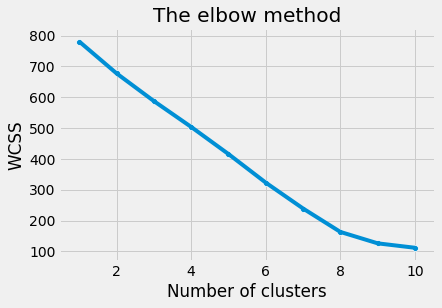

In [82]:
# use elbow method to find the optimal numbers of clusters
def cluster_numbers(x_data):
    # intialize empty list for wscc(Within cluster some of Squares)
    wcss = []
    # for loop for taking multiple clusters
    for clusters in range(1, 11):
        k_means = KMeans(n_clusters= clusters, init= 'k-means++', max_iter=300, n_init= 10, random_state=0)
        k_means.fit(x_data)
        wcss.append(k_means.inertia_)
   # to display graph properly eith grids
    plt.style.use('fivethirtyeight')
    plt.plot(range(1,11),wcss)
    sb.scatterplot(range(1,11),wcss)
    plt.title("The elbow method")
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
#     print(wcss)
    
# call method 
cluster_numbers(x_train)

In [83]:
k_means = KMeans(n_clusters= 8, init= 'k-means++', max_iter=300, n_init= 10, random_state=0)
k_means.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [89]:
y_prediction_k_ = k_means.predict(x_train)

In [90]:
y_train, y_prediction_k_

(array([ 70,  35,  73,  54,  20,  95,  21,  29,  58,  36,   9,  59, 105,
         99,  41,  11,  94,  14,  12,  69,  49,   3,  60,  18,  28,   0,
         62,  83,  98,   8,   5,   4,  84,  53, 104,  76, 111,  52,  80,
        110,  39,  63,  40,  88,  74, 108,  56,  15,  32,  64,  47,  46,
         71, 103,  65, 107,  61,  57,  34,  25,  79,  97, 101, 102,  50,
         51,  67,  81,  77,  85,  31]),
 array([2, 3, 2, 4, 5, 6, 5, 5, 4, 3, 7, 4, 1, 1, 3, 0, 6, 5, 0, 2, 4, 7,
        4, 5, 5, 7, 4, 6, 1, 7, 7, 7, 6, 4, 1, 6, 1, 4, 6, 1, 3, 2, 3, 6,
        2, 1, 4, 5, 3, 2, 3, 3, 2, 1, 2, 1, 4, 4, 3, 5, 6, 1, 1, 1, 4, 4,
        2, 6, 6, 6, 5], dtype=int32))

In [84]:
y_prediction_k_means = k_means.predict(x_cv)
y_prediction_k_means.shape, y_cv.shape

((18,), (18,))

In [85]:
y_cv

array([ 30,  43,  19,  55,  37,  17,  86,  23,  87,  44,  68,  42,  38,
        72,   6,  27,   1, 109])

In [86]:
y_prediction_k_means

array([5, 3, 5, 4, 3, 5, 6, 5, 6, 3, 2, 3, 3, 2, 7, 5, 7, 1], dtype=int32)

In [87]:
# def visualization_for_clusters(x_data, y_kmeans, k_means_obj):
#         colors=['orange', 'blue', 'green']
#         data = x_data.values[:, 0:69]
#         category = x_data.values[:, 68]
                        
#         for i in range(3):
# #             plt.scatter(x[y_kmeans == 0 , 0], x[y_kmeans == 0 ,1], s = 100, c = 'red', label = 'Careful')
#             plt.scatter(x_data[y_kmeans == i, 0], x_data[y_kmeans == i,1], marker='D', s=100, color = colors[int(category[i])])
#         plt.scatter(k_means_obj.cluster_centers_[:,0], k_means_obj.cluster_centers_[:,1], marker='*', c='g', s=150)

In [88]:
# visualization_for_clusters(x_train, y_prediction_k_means, k_means)